In [1]:
#Import libraries
import datetime as dt
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from pandas.plotting import scatter_matrix
%matplotlib inline

In [2]:
#Period
start = dt.datetime(1990, 1, 1)
end = dt.datetime(2022, 12, 1)

# S&P 500 Analysis

## Download

In [3]:
#Downloading the data for the S&P500 index.
sp = yf.download('^GSPC', start, end)

[*********************100%***********************]  1 of 1 completed


In [4]:
sp.info()
sp.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8294 entries, 1990-01-02 to 2022-11-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       8294 non-null   float64
 1   High       8294 non-null   float64
 2   Low        8294 non-null   float64
 3   Close      8294 non-null   float64
 4   Adj Close  8294 non-null   float64
 5   Volume     8294 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 453.6 KB


Open        High         Low       Close   Adj Close  \
Date                                                                     
1990-01-02  353.399994  359.690002  351.980011  359.690002  359.690002   
1990-01-03  359.690002  360.589996  357.890015  358.760010  358.760010   
1990-01-04  358.760010  358.760010  352.890015  355.670013  355.670013   
1990-01-05  355.670013  355.670013  351.350006  352.200012  352.200012   
1990-01-08  352.200012  354.239990  350.540009  353.790009  353.790009   

               Volume  
Date                   
1990-01-02  162070000  
1990-01-03  192330000  
1990-01-04  177000000  
1990-01-05  158530000  
1990-01-08  140110000

## Statistics and Outliers

In [5]:
#Describing the data for the period (32 years, 1990-2022).
sp_statistics = sp.describe()
sp_statistics

Open         High          Low        Close    Adj Close  \
count  8294.000000  8294.000000  8294.000000  8294.000000  8294.000000   
mean   1496.345923  1505.284558  1486.746571  1496.624059  1496.624059   
std     991.487444   996.955476   985.513819   991.535117   991.535117   
min     295.450012   301.450012   294.510010   295.459991   295.459991   
25%     879.255020   890.415024   868.352493   879.162521   879.162521   
50%    1249.625000  1259.844971  1240.104980  1250.100037  1250.100037   
75%    1939.542480  1950.127472  1927.182526  1940.404968  1940.404968   
max    4804.509766  4818.620117  4780.040039  4796.560059  4796.560059   

             Volume  
count  8.294000e+03  
mean   2.408114e+09  
std    1.851787e+09  
min    1.499000e+07  
25%    6.027175e+08  
50%    2.295150e+09  
75%    3.786695e+09  
max    1.145623e+10

In [6]:
#Three Sigma Rule
#Open
open_std = sp_statistics.loc['std']['Open']
open_mean = sp_statistics.loc['mean']['Open']
open_min = open_mean - (3 * open_std)
open_max = open_mean + (3 * open_std)
#High
high_std = sp_statistics.loc['std']['High']
high_mean = sp_statistics.loc['mean']['High']
high_min = high_mean - (3 * high_std)
high_max = high_mean + (3 * high_std)
#Low
low_std = sp_statistics.loc['std']['Low']
low_mean = sp_statistics.loc['mean']['Low']
low_min = low_mean - (3 * low_std)
low_max = low_mean + (3 * low_std)
#Close
close_std = sp_statistics.loc['std']['Close']
close_mean = sp_statistics.loc['mean']['Close']
close_min = close_mean - (3 * close_std)
close_max = close_mean + (3 * close_std)
#Adj Close
aclose_std = sp_statistics.loc['std']['Adj Close']
aclose_mean = sp_statistics.loc['mean']['Adj Close']
aclose_min = aclose_mean - (3 * aclose_std)
aclose_max = aclose_mean + (3 * aclose_std)
#Volume
vol_std = sp_statistics.loc['std']['Volume']
vol_mean = sp_statistics.loc['mean']['Volume']
vol_min = vol_mean - (3 * vol_std)
vol_max = vol_mean + (3 * vol_std)

In [7]:
query = sp.query("Open < @open_min")
subquery = sp.query("Open > @open_max")
subquery.tail()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2022-04-06  4494.169922  4503.939941  4450.040039  4481.149902  4481.149902   
2022-04-07  4474.649902  4521.160156  4450.299805  4500.209961  4500.209961   
2022-04-08  4494.149902  4520.410156  4474.600098  4488.279785  4488.279785   
2022-04-20  4472.259766  4488.290039  4448.759766  4459.450195  4459.450195   
2022-04-21  4489.169922  4512.939941  4384.470215  4393.660156  4393.660156   

                Volume  
Date                    
2022-04-06  4986830000  
2022-04-07  4821490000  
2022-04-08  4083200000  
2022-04-20  4290450000  
2022-04-21  4636890000

In [8]:
query = sp.query("High < @high_min")
subquery = sp.query("High > @high_max")
subquery

Open         High          Low        Close    Adj Close  \
Date                                                                          
2021-08-25  4490.450195  4501.709961  4485.660156  4496.189941  4496.189941   
2021-08-27  4474.100098  4513.330078  4474.100098  4509.370117  4509.370117   
2021-08-30  4513.759766  4537.359863  4513.759766  4528.790039  4528.790039   
2021-08-31  4529.750000  4531.390137  4515.799805  4522.680176  4522.680176   
2021-09-01  4528.799805  4537.109863  4522.020020  4524.089844  4524.089844   
...                 ...          ...          ...          ...          ...   
2022-04-05  4572.450195  4593.450195  4514.169922  4525.120117  4525.120117   
2022-04-06  4494.169922  4503.939941  4450.040039  4481.149902  4481.149902   
2022-04-07  4474.649902  4521.160156  4450.299805  4500.209961  4500.209961   
2022-04-08  4494.149902  4520.410156  4474.600098  4488.279785  4488.279785   
2022-04-21  4489.169922  4512.939941  4384.470215  4393.660156  4393.660156   

                Volume  
Date                    
2021-08-25  3444700000  
2021-08-27  3331200000  
2021-08-30  3168660000  
2021-08-31  4290710000  
2021-09-01  4057340000  
...                ...  
2022-04-05  4800620000  
2022-04-06  4986830000  
2022-04-07  4821490000  
2022-04-08  4083200000  
2022-04-21  4636890000  

[101 rows x 6 columns]

In [9]:
query = sp.query("Low < @low_min")
subquery = sp.query("Low > @low_max")
subquery

Open         High          Low        Close    Adj Close  \
Date                                                                          
2021-08-13  4464.839844  4468.370117  4460.819824  4468.000000  4468.000000   
2021-08-23  4450.290039  4489.879883  4450.290039  4479.529785  4479.529785   
2021-08-24  4484.399902  4492.810059  4482.279785  4486.229980  4486.229980   
2021-08-25  4490.450195  4501.709961  4485.660156  4496.189941  4496.189941   
2021-08-26  4493.750000  4495.899902  4468.990234  4470.000000  4470.000000   
...                 ...          ...          ...          ...          ...   
2022-04-05  4572.450195  4593.450195  4514.169922  4525.120117  4525.120117   
2022-04-06  4494.169922  4503.939941  4450.040039  4481.149902  4481.149902   
2022-04-07  4474.649902  4521.160156  4450.299805  4500.209961  4500.209961   
2022-04-08  4494.149902  4520.410156  4474.600098  4488.279785  4488.279785   
2022-04-20  4472.259766  4488.290039  4448.759766  4459.450195  4459.450195   

                Volume  
Date                    
2021-08-13  3016470000  
2021-08-23  3576530000  
2021-08-24  3979220000  
2021-08-25  3444700000  
2021-08-26  3263980000  
...                ...  
2022-04-05  4800620000  
2022-04-06  4986830000  
2022-04-07  4821490000  
2022-04-08  4083200000  
2022-04-20  4290450000  

[107 rows x 6 columns]

In [10]:
query = sp.query("Close < @close_min")
subquery = sp.query("Close > @close_max")
subquery

Open         High          Low        Close    Adj Close  \
Date                                                                          
2021-08-16  4461.649902  4480.259766  4437.660156  4479.709961  4479.709961   
2021-08-23  4450.290039  4489.879883  4450.290039  4479.529785  4479.529785   
2021-08-24  4484.399902  4492.810059  4482.279785  4486.229980  4486.229980   
2021-08-25  4490.450195  4501.709961  4485.660156  4496.189941  4496.189941   
2021-08-27  4474.100098  4513.330078  4474.100098  4509.370117  4509.370117   
...                 ...          ...          ...          ...          ...   
2022-04-04  4547.970215  4583.500000  4539.209961  4582.640137  4582.640137   
2022-04-05  4572.450195  4593.450195  4514.169922  4525.120117  4525.120117   
2022-04-06  4494.169922  4503.939941  4450.040039  4481.149902  4481.149902   
2022-04-07  4474.649902  4521.160156  4450.299805  4500.209961  4500.209961   
2022-04-08  4494.149902  4520.410156  4474.600098  4488.279785  4488.279785   

                Volume  
Date                    
2021-08-16  3370640000  
2021-08-23  3576530000  
2021-08-24  3979220000  
2021-08-25  3444700000  
2021-08-27  3331200000  
...                ...  
2022-04-04  4547350000  
2022-04-05  4800620000  
2022-04-06  4986830000  
2022-04-07  4821490000  
2022-04-08  4083200000  

[105 rows x 6 columns]

In [11]:
query = sp.query("`Adj Close`< @aclose_min")
subquery = sp.query("`Adj Close` > @aclose_max")
subquery

Open         High          Low        Close    Adj Close  \
Date                                                                          
2021-08-16  4461.649902  4480.259766  4437.660156  4479.709961  4479.709961   
2021-08-23  4450.290039  4489.879883  4450.290039  4479.529785  4479.529785   
2021-08-24  4484.399902  4492.810059  4482.279785  4486.229980  4486.229980   
2021-08-25  4490.450195  4501.709961  4485.660156  4496.189941  4496.189941   
2021-08-27  4474.100098  4513.330078  4474.100098  4509.370117  4509.370117   
...                 ...          ...          ...          ...          ...   
2022-04-04  4547.970215  4583.500000  4539.209961  4582.640137  4582.640137   
2022-04-05  4572.450195  4593.450195  4514.169922  4525.120117  4525.120117   
2022-04-06  4494.169922  4503.939941  4450.040039  4481.149902  4481.149902   
2022-04-07  4474.649902  4521.160156  4450.299805  4500.209961  4500.209961   
2022-04-08  4494.149902  4520.410156  4474.600098  4488.279785  4488.279785   

                Volume  
Date                    
2021-08-16  3370640000  
2021-08-23  3576530000  
2021-08-24  3979220000  
2021-08-25  3444700000  
2021-08-27  3331200000  
...                ...  
2022-04-04  4547350000  
2022-04-05  4800620000  
2022-04-06  4986830000  
2022-04-07  4821490000  
2022-04-08  4083200000  

[105 rows x 6 columns]

In [12]:
query = sp.query("Volume< @vol_min")
subquery = sp.query("Volume > @vol_max")
subquery

Open         High          Low        Close    Adj Close  \
Date                                                                          
2008-09-15  1250.920044  1250.920044  1192.699951  1192.699951  1192.699951   
2008-09-16  1188.310059  1214.839966  1169.280029  1213.599976  1213.599976   
2008-09-17  1210.339966  1210.339966  1155.880005  1156.390015  1156.390015   
2008-09-18  1157.079956  1211.140015  1133.500000  1206.510010  1206.510010   
2008-09-19  1213.109985  1265.119995  1213.109985  1255.079956  1255.079956   
2008-10-08   988.909973  1021.059998   970.969971   984.940002   984.940002   
2008-10-10   902.309998   936.359985   839.799988   899.219971   899.219971   
2008-10-14  1009.969971  1044.310059   972.070007   998.010010   998.010010   
2008-10-16   909.530029   947.710022   865.830017   946.429993   946.429993   
2008-11-20   805.869995   820.520020   747.780029   752.440002   752.440002   
2008-11-21   755.840027   801.200012   741.020020   800.030029   800.030029   
2009-02-20   775.869995   778.690002   754.250000   770.049988   770.049988   
2009-02-27   749.929993   751.270020   734.520020   735.090027   735.090027   
2009-03-10   679.280029   719.599976   679.280029   719.599976   719.599976   
2009-03-18   776.010010   803.039978   765.640015   794.349976   794.349976   
2009-03-19   797.919983   803.239990   781.820007   784.039978   784.039978   
2009-05-06   903.950012   920.280029   903.950012   919.530029   919.530029   
2009-05-07   919.580017   929.580017   901.359985   907.390015   907.390015   
2009-05-08   909.030029   930.169983   909.030029   929.229980   929.229980   
2009-05-20   908.619995   924.599976   901.369995   903.469971   903.469971   
2010-04-16  1210.170044  1210.170044  1186.770020  1192.130005  1192.130005   
2010-05-06  1164.380005  1167.579956  1065.790039  1128.150024  1128.150024   
2010-05-07  1127.040039  1135.130005  1094.150024  1110.880005  1110.880005   
2010-05-20  1107.339966  1107.339966  1071.579956  1071.589966  1071.589966   
2020-02-28  2916.899902  2959.719971  2855.840088  2954.219971  2954.219971   
2020-03-09  2863.889893  2863.889893  2734.429932  2746.560059  2746.560059   
2020-03-12  2630.860107  2660.949951  2478.860107  2480.639893  2480.639893   
2020-03-13  2569.989990  2711.330078  2492.370117  2711.020020  2711.020020   
2020-03-17  2425.659912  2553.929932  2367.040039  2529.189941  2529.189941   
2020-03-18  2436.500000  2453.570068  2280.520020  2398.100098  2398.100098   
2020-03-20  2431.939941  2453.010010  2295.560059  2304.919922  2304.919922   
2020-03-25  2457.770020  2571.419922  2407.530029  2475.560059  2475.560059   
2020-06-05  3163.840088  3211.719971  3163.840088  3193.929932  3193.929932   
2020-06-08  3199.919922  3233.129883  3196.000000  3232.389893  3232.389893   
2020-06-19  3140.290039  3155.530029  3083.110107  3097.739990  3097.739990   
2020-06-26  3073.199951  3073.729980  3004.629883  3009.050049  3009.050049   
2020-11-09  3583.040039  3645.989990  3547.479980  3550.500000  3550.500000   
2021-01-27  3836.830078  3836.830078  3732.479980  3750.770020  3750.770020   
2021-12-17  4652.500000  4666.700195  4600.220215  4620.640137  4620.640137   
2022-03-18  4407.339844  4465.399902  4390.569824  4463.120117  4463.120117   
2022-06-17  3665.899902  3707.709961  3636.870117  3674.840088  3674.840088   
2022-06-24  3821.750000  3913.649902  3821.750000  3911.739990  3911.739990   

                 Volume  
Date                     
2008-09-15   8279510000  
2008-09-16   9459830000  
2008-09-17   9431870000  
2008-09-18  10082690000  
2008-09-19   9387170000  
2008-10-08   8716330000  
2008-10-10  11456230000  
2008-10-14   8161990000  
2008-10-16   7984500000  
2008-11-20   9093740000  
2008-11-21   9495900000  
2009-02-20   8210590000  
2009-02-27   8926480000  
2009-03-10   8618330000  
2009-03-18   9098450000  
2009-03-19   9033870000  
2009-05-06   8555040000  
2009-05-07   9120100000  
2009-05-08   816328000

In all cases, there were outliers in the 'max' border.
Some noticeable dates:
- August 2021 to April 2022 (Open, High, Low, Close)
- September to November 2008 (Volume)
- February to May 2009 (Volume)
- May 2010 (Volume)
- February, June, November 2020 (Volume)
- January and December 2021 (Volume)
- March and June 2022 (Volume)

## Volume 

(Number of Shares Traded in a Time Period)

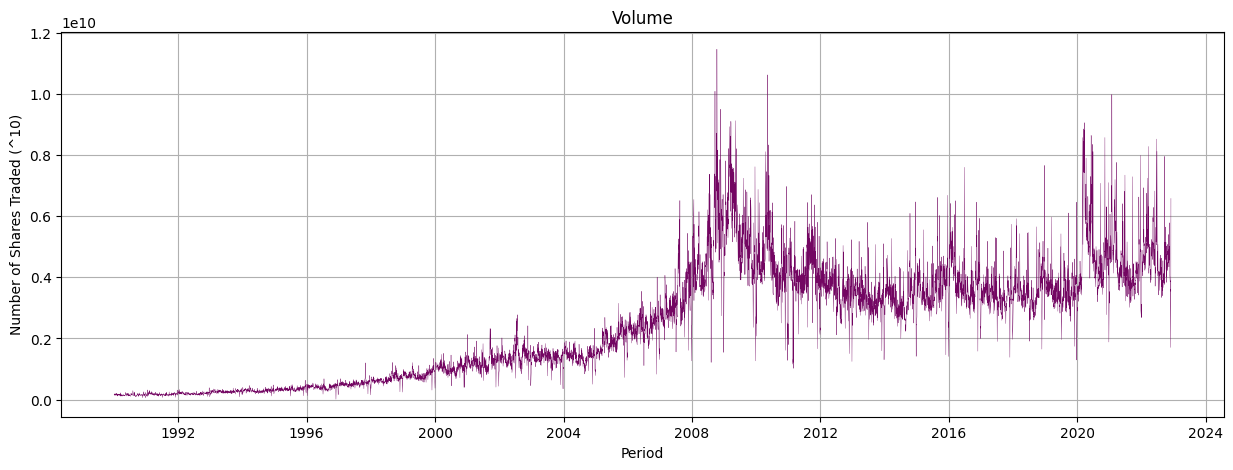

In [13]:
#S&P 500 Volume Plot from 1990 to 2022.

#Data
x = sp.index.values
y_volume = sp['Volume'].values

#Plot
fig_volume, ax_volume = plt.subplots(figsize = (15, 5))
ax_volume.plot(x, y_volume, '#730662', linewidth = 0.25)
ax_volume.grid()
ax_volume.set_xlabel('Period')
ax_volume.set_ylabel('Number of Shares Traded (^10)')
ax_volume.set_title('Volume')
plt.show()


In [14]:
#Major spike in volume from 1990 to 2022
sp.iloc[[sp['Volume'].argmax()]]

Open        High         Low       Close   Adj Close  \
Date                                                                     
2008-10-10  902.309998  936.359985  839.799988  899.219971  899.219971   

                 Volume  
Date                     
2008-10-10  11456230000

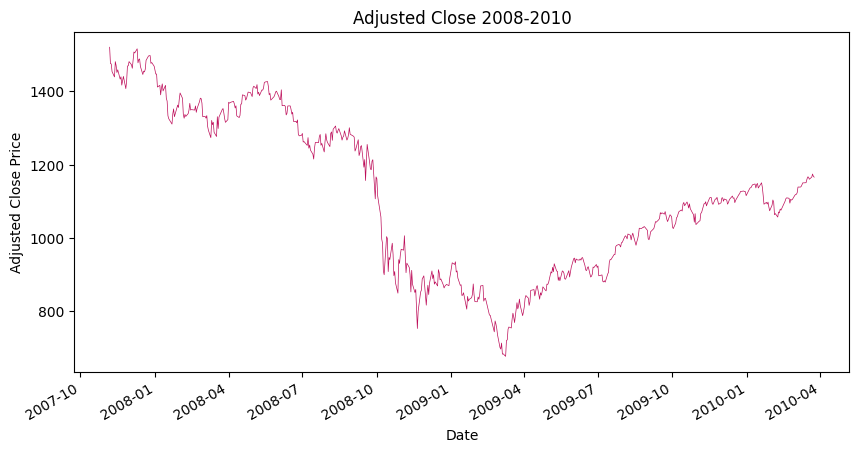

In [15]:
#Coincidental with that spike in volume, there's a sharp decline in the stock prices around October 2008.
sp.iloc[4500:5100]['Adj Close'].plot(ylabel = 'Adjusted Close Price', title = 'Adjusted Close 2008-2010', figsize = (10, 5), color = '#bd0d59', linewidth = 0.5)
plt.show()

Compared to the last two decades, the 90's had significantly lower volume.

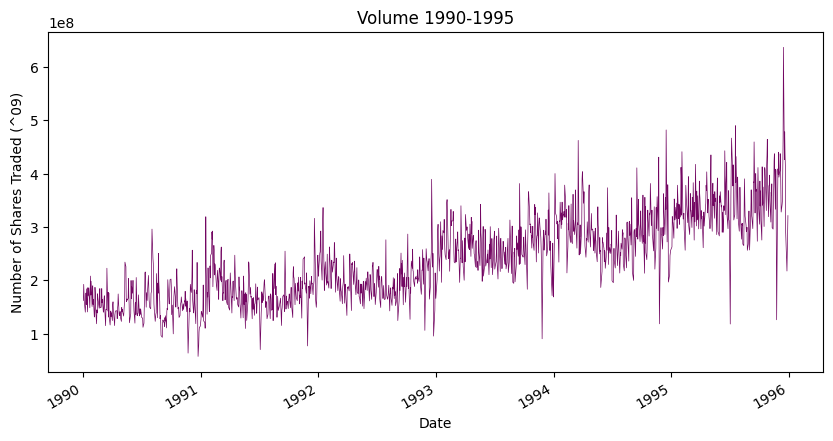

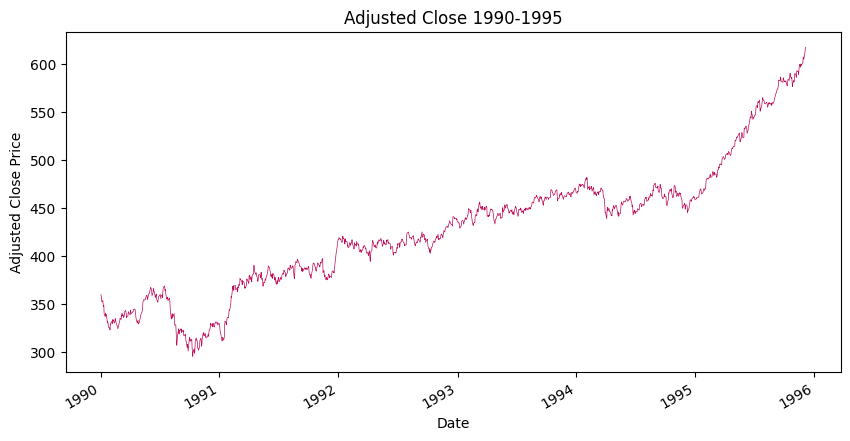

In [16]:
sp['1990-01-01':'1995-12-30']['Volume'].plot(ylabel = 'Number of Shares Traded (^09)', title = 'Volume 1990-1995', figsize = (10, 5), color = '#730662', linewidth = 0.5)
plt.show()
sp.iloc[0:1500]['Adj Close'].plot(ylabel = 'Adjusted Close Price', title = 'Adjusted Close 1990-1995', figsize = (10, 5), color = '#bd0d59', linewidth = 0.5)
plt.show()

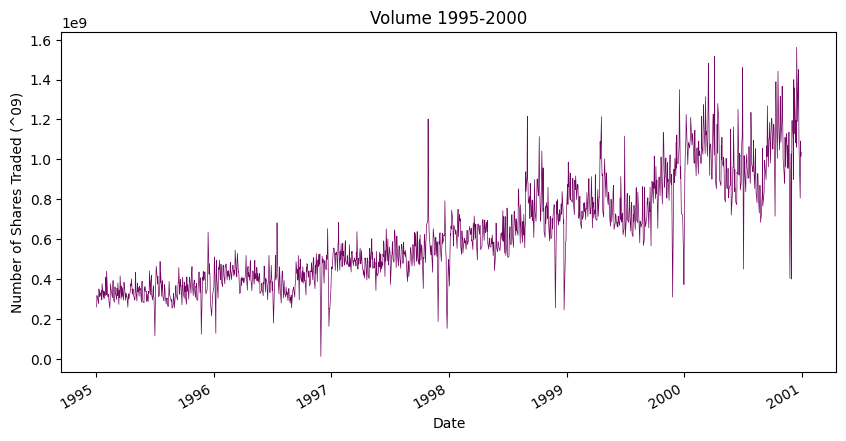

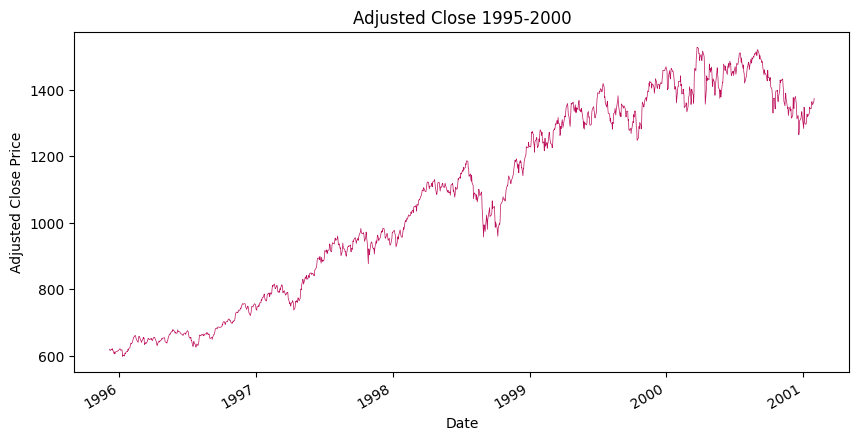

In [17]:
sp['1995-01-01':'2000-12-30']['Volume'].plot(ylabel = 'Number of Shares Traded (^09)', title = 'Volume 1995-2000', figsize = (10, 5), color = '#730662', linewidth = 0.5)
plt.show()
sp.iloc[1500:2800]['Adj Close'].plot(ylabel = 'Adjusted Close Price', title = 'Adjusted Close 1995-2000', figsize = (10, 5), color = '#bd0d59', linewidth = 0.5)
plt.show()

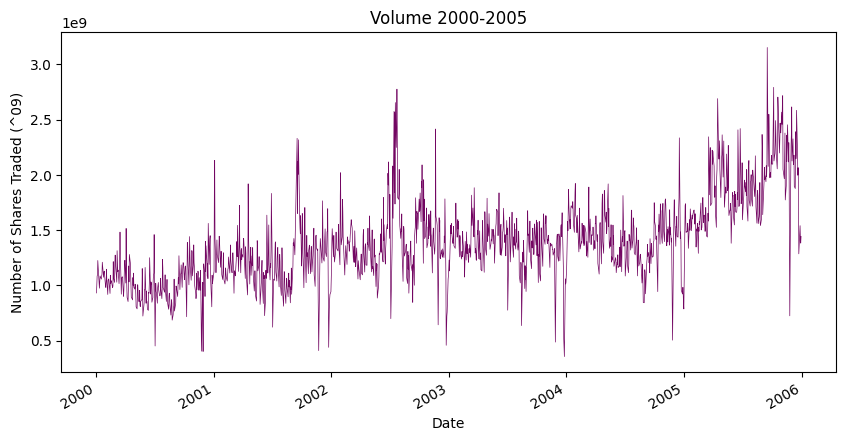

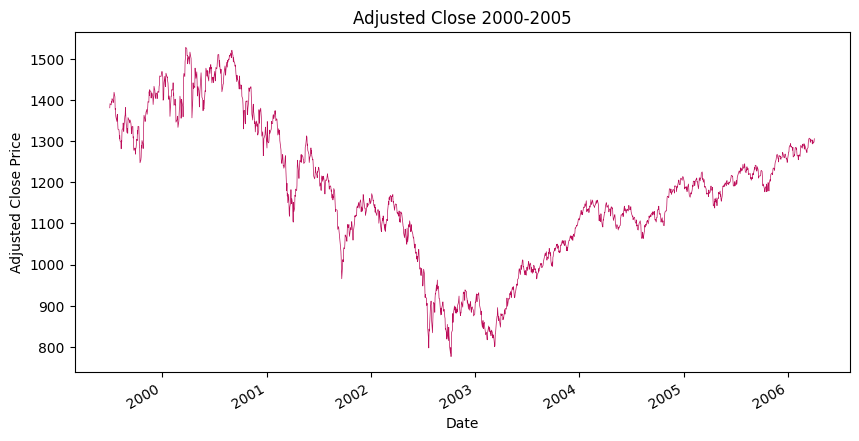

In [18]:
sp['2000-01-01':'2005-12-30']['Volume'].plot(ylabel = 'Number of Shares Traded (^09)', title = 'Volume 2000-2005', figsize = (10, 5), color = '#730662', linewidth = 0.5)
plt.show()
sp.iloc[2400:4100]['Adj Close'].plot(ylabel = 'Adjusted Close Price', title = 'Adjusted Close 2000-2005', figsize = (10, 5), color = '#bd0d59', linewidth = 0.5)
plt.show()

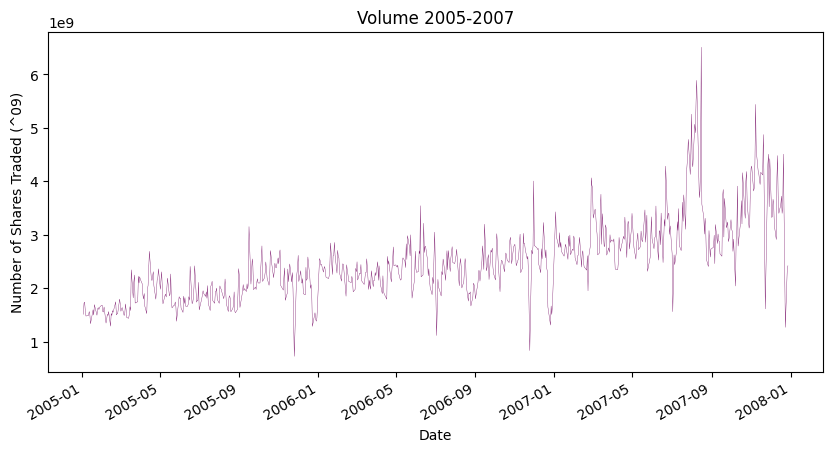

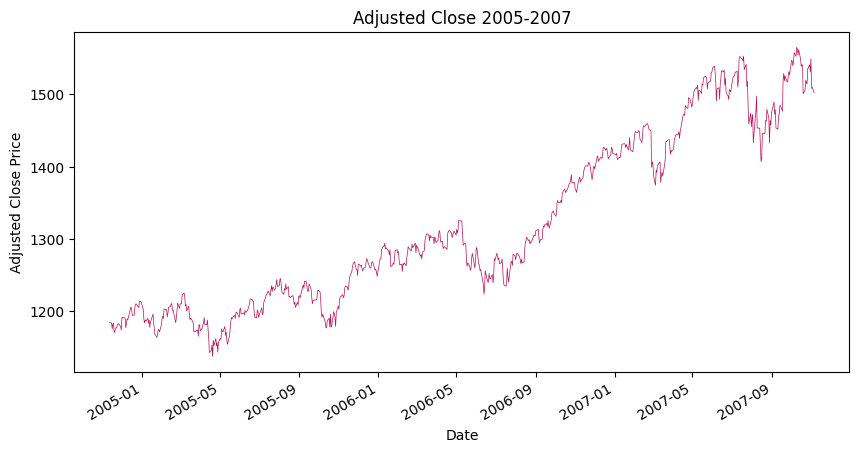

In [19]:
#Looking closely at a major volume spike (2005-2007).
sp['2005-01-01':'2007-12-30']['Volume'].plot(ylabel = 'Number of Shares Traded (^09)', title = 'Volume 2005-2007', figsize = (10, 5), color = '#730662', linewidth = 0.25)
plt.show()
sp.iloc[3750:4500]['Adj Close'].plot(ylabel = 'Adjusted Close Price', title = 'Adjusted Close 2005-2007', figsize = (10, 5), color = '#bd0d59', linewidth = 0.5)
plt.show()
#In this case, both volume and the stock price are elevating.

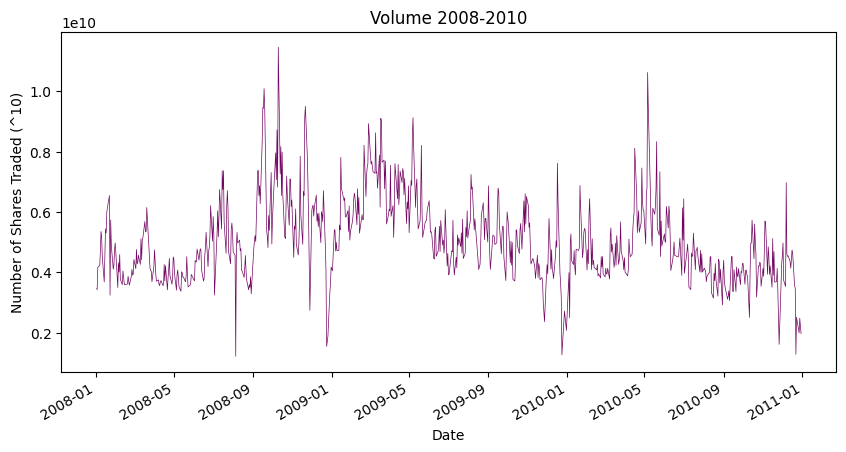

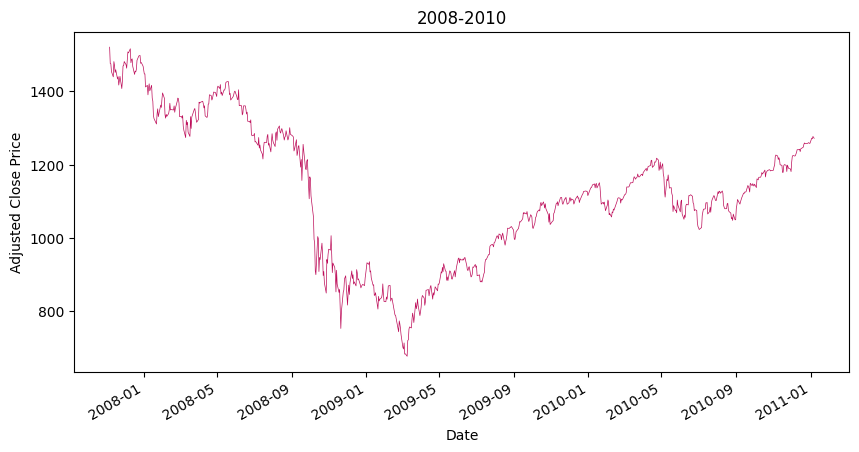

In [20]:
#Looking closely on the 2º major volume spike (2008-2010).
sp.loc['2008-01-01':'2010-12-30']['Volume'].plot(ylabel = 'Number of Shares Traded (^10)', title = 'Volume 2008-2010', figsize = (10, 5), color = '#730662', linewidth = 0.5)
plt.show()
sp.iloc[4500:5300]['Adj Close'].plot(ylabel = 'Adjusted Close Price', title = '2008-2010', figsize = (10, 5), color = '#bd0d59', linewidth = 0.5)
plt.show()

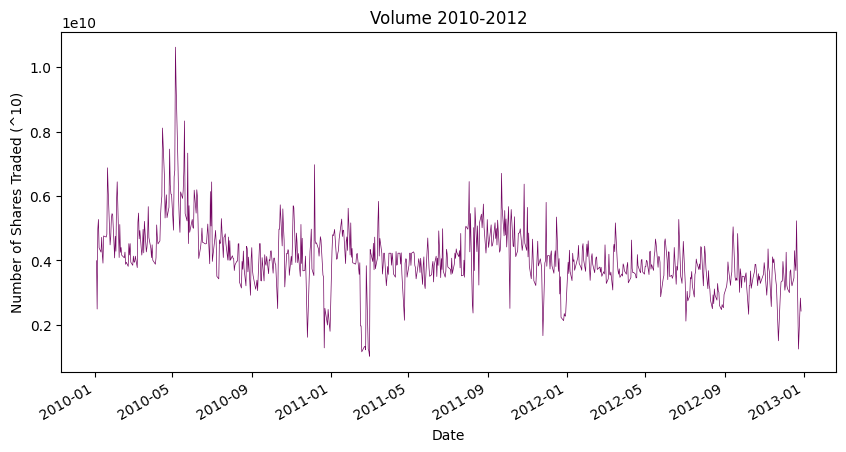

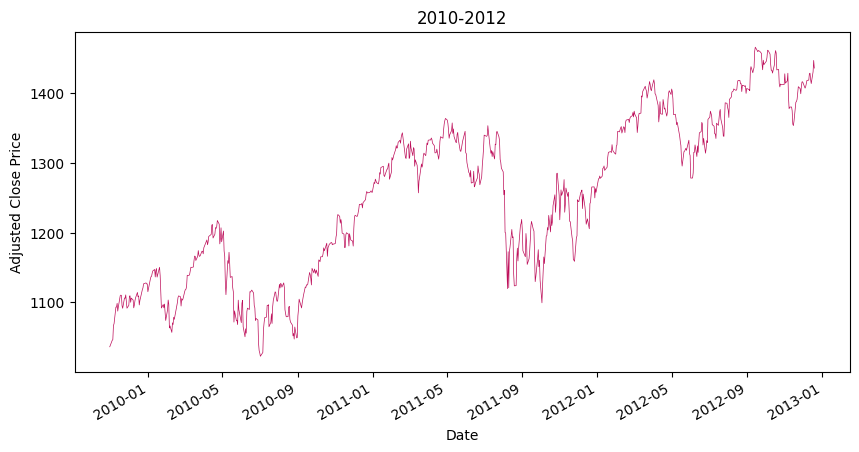

In [21]:
#Looking closely on the 3º major volume spike (2010-2012).
sp['2010-01-01':'2012-12-30']['Volume'].plot(ylabel = 'Number of Shares Traded (^10)', title = 'Volume 2010-2012', figsize = (10, 5), color = '#730662', linewidth = 0.5)
plt.show()
sp.iloc[5000:5790]['Adj Close'].plot(ylabel = 'Adjusted Close Price', title = '2010-2012', figsize = (10, 5), color = '#bd0d59', linewidth = 0.5)
plt.show()
#Apparently there's an increment in stock price and volume "stability", watching the general trend.

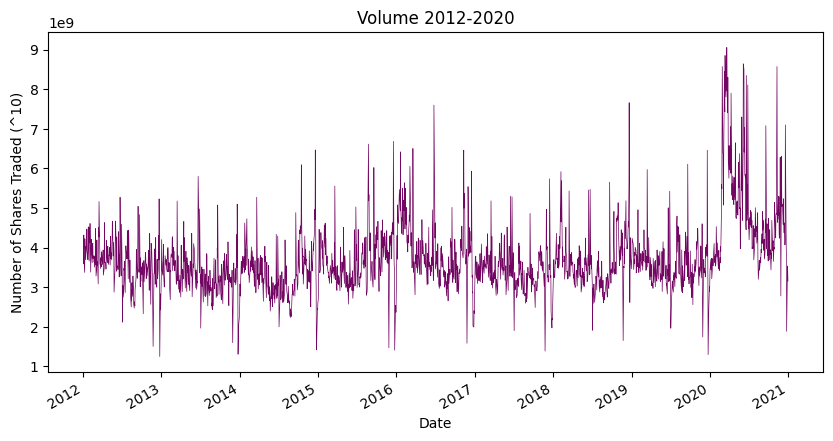

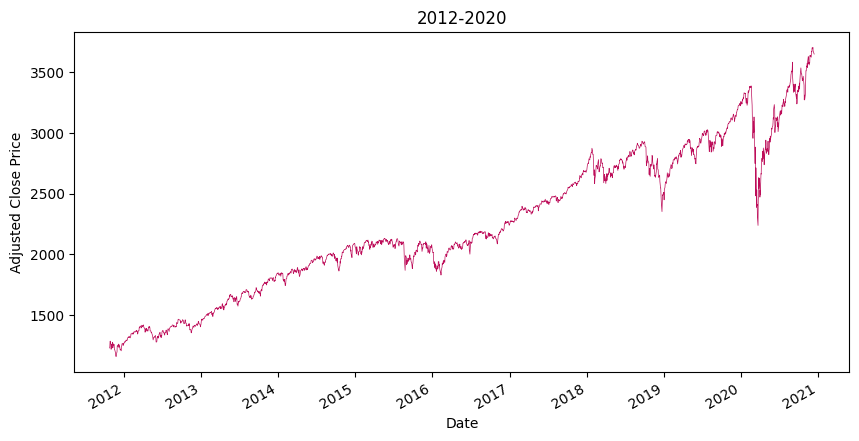

In [22]:
sp['2012-01-01':'2020-12-30']['Volume'].plot(ylabel = 'Number of Shares Traded (^10)', title = 'Volume 2012-2020', figsize = (10, 5), color = '#730662', linewidth = 0.5)
plt.show()
sp.iloc[5500:7800]['Adj Close'].plot(ylabel = 'Adjusted Close Price', title = '2012-2020', figsize = (10, 5), color = '#bd0d59', linewidth = 0.5)
plt.show()

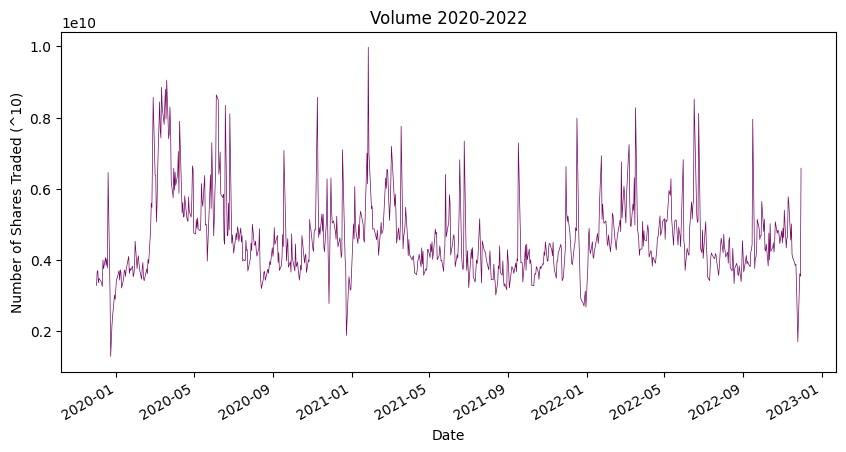

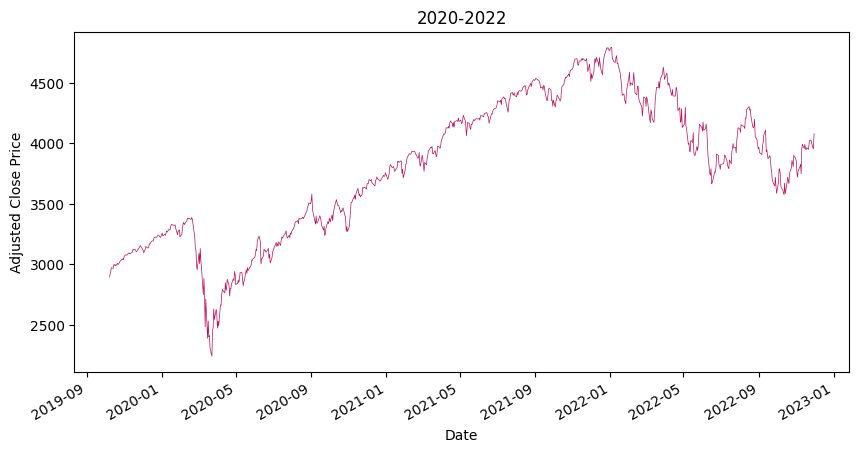

In [23]:
#Looking closely on the 4º major volume spike (2020-2022).
sp['2019-12-01':'2022-12-30']['Volume'].plot(ylabel = 'Number of Shares Traded (^10)', title = 'Volume 2020-2022', figsize = (10, 5), color = '#730662', linewidth = 0.5)
plt.show()
sp.iloc[7500:8294]['Adj Close'].plot(ylabel = 'Adjusted Close Price', title = '2020-2022', figsize = (10, 5), color = '#bd0d59', linewidth = 0.5)
plt.show()
#Between January and May 2020 there's a decline in the Adjusted Close Price.
#We can see a rise between May 2020 and January 2022.

## OHLC

In [24]:
sp.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
1990-01-02  353.399994  359.690002  351.980011  359.690002  359.690002   
1990-01-03  359.690002  360.589996  357.890015  358.760010  358.760010   
1990-01-04  358.760010  358.760010  352.890015  355.670013  355.670013   
1990-01-05  355.670013  355.670013  351.350006  352.200012  352.200012   
1990-01-08  352.200012  354.239990  350.540009  353.790009  353.790009   

               Volume  
Date                   
1990-01-02  162070000  
1990-01-03  192330000  
1990-01-04  177000000  
1990-01-05  158530000  
1990-01-08  140110000

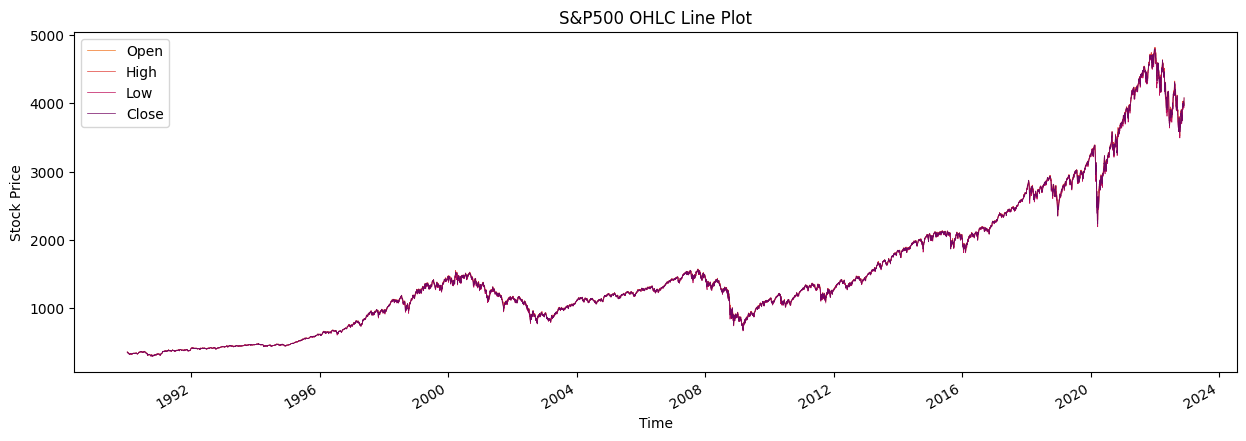

In [25]:
#S&P 500 OHLC Line Plot from 1990 to 2022.

#Data
sp['Open'].plot(label = 'Open', figsize = (15, 5), linewidth = 0.5, color = '#f1731f')
sp['High'].plot(label = 'High', linewidth = 0.5, color = '#e03e36')
sp['Low'].plot(label = 'Low', linewidth = 0.5, color = '#bd0d59')
sp['Close'].plot(label = 'Close', linewidth = 0.5, color = '#730662')

#Setup
plt.legend()
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('S&P500 OHLC Line Plot')

plt.show()

#Differences can only be seen by zooming in. A slider in the period shown can solve it.

## Representation of Market Capitalization



(Amount of Money Being Traded)

$$
AdjClose * Volume
$$

In [26]:
sp['Total Traded'] = sp['Adj Close'] * sp['Volume']

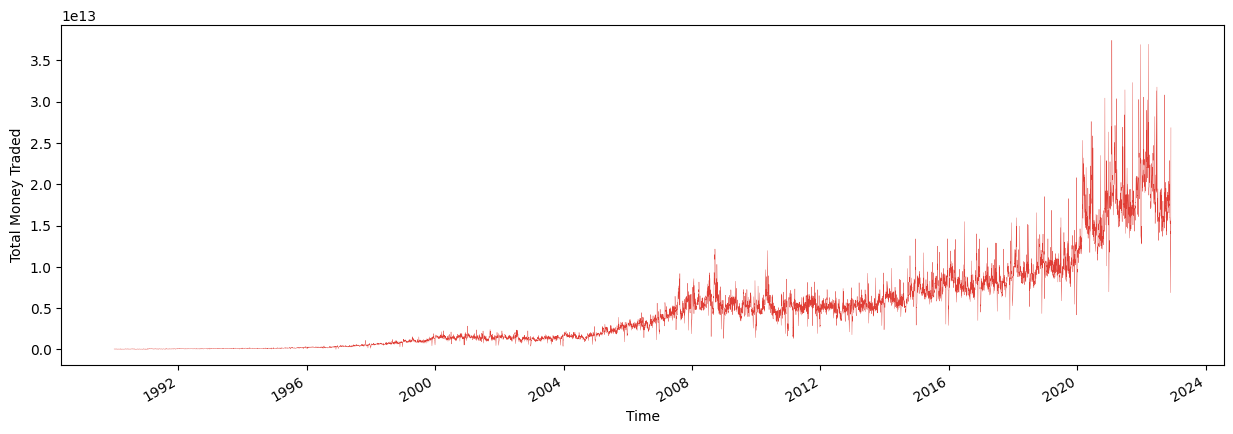

In [27]:
sp['Total Traded'].plot(xlabel = 'Time', ylabel = 'Total Money Traded', figsize = (15,5), linewidth = 0.25, title = '', color = '#e03e36')
plt.show()

In [28]:
sp.iloc[[sp['Total Traded'].argmax()]]

#World Bank expects global economy to expand by 4% in 2021
#https://news.un.org/en/story/2021/01/1081392
#Tesla's Stock is the Original GameStop
#https://www.wsj.com/articles/tesla-stock-is-the-original-gamestop-11611798484
#Stock's slip in final minutes, close lower
#https://www.wsj.com/articles/global-stock-markets-dow-update-01-26-2021-11611651206


Open         High         Low       Close   Adj Close  \
Date                                                                       
2021-01-27  3836.830078  3836.830078  3732.47998  3750.77002  3750.77002   

                Volume  Total Traded  
Date                                  
2021-01-27  9976520000  3.741963e+13

## Moving Average

In [29]:
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html
sp['Mov Av 80'] = sp['Adj Close'].rolling(80).mean()

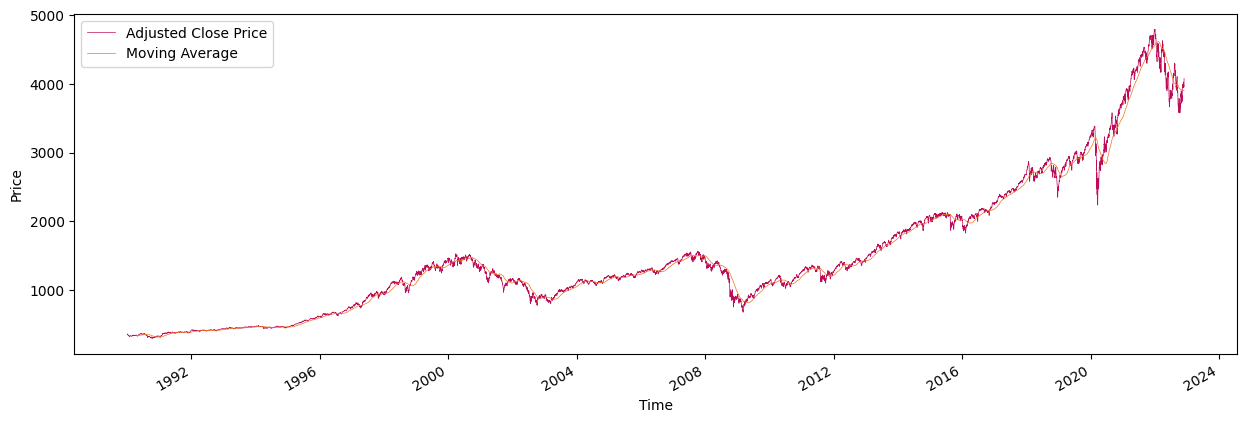

In [30]:
#S&P 500 Moving Average Plot from 1990 to 2022

sp['Adj Close'].plot(label = 'Adjusted Close Price', figsize = (15, 5), linewidth = 0.5, color = '#bd0d59')
sp['Mov Av 80'].plot(label = 'Moving Average', linewidth = 0.5, color = '#f1731f')
plt.legend()
plt.ylabel('Price')
plt.xlabel('Time')
plt.show()

## Daily Percentage Change

Percentage Gain or Loss
$$
r_{t} = \frac{p_{t}}{p_{t-1}}\ - 1
$$
"If your daily returns have a wide distribution, the stock is more volatile."
Volatility implies more risk for the investor, generally we want stability.

In [31]:
#S&P 500 Percent Returns
sp['Returns'] = (sp['Close']/sp['Close'].shift(1)) - 1

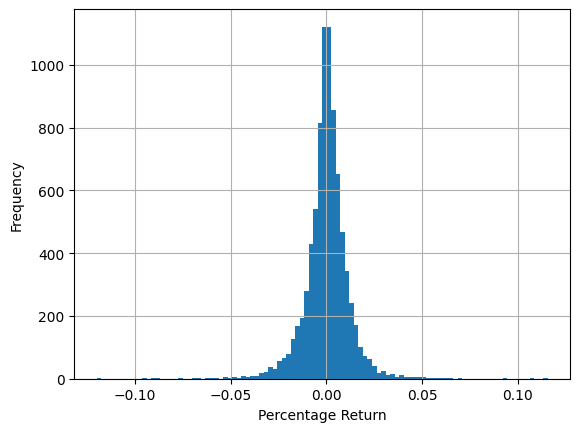

In [32]:
#Percent Returns Histogram
sp['Returns'].hist(bins = 100)
plt.xlabel('Percentage Return')
plt.ylabel('Frequency')
plt.show()

#The width of the shape is related to the Standard Deviation. 
#Therefore, more volatility.

# S&P 500 Companies

## Download

In [33]:
#Getting the tickers from the wikipedia list of S&P 500 companies.
sp500_url = "https://en.wikipedia.org//wiki/List_of_S&P_500_companies"
ticker = pd.read_html(sp500_url)
ticker = ticker[0]
ticker_list = list(ticker['Symbol'].values)

GICS Sector Pie Graph

In [34]:
#Count number of indices in each sector.
group = ticker.groupby(by = 'GICS Sector')['Symbol'].count()
group

GICS Sector
Communication Services    24
Consumer Discretionary    53
Consumer Staples          37
Energy                    23
Financials                73
Health Care               65
Industrials               73
Information Technology    66
Materials                 29
Real Estate               30
Utilities                 30
Name: Symbol, dtype: int64

In [35]:
#Data.
x = group.tolist()
y = group.index.tolist()

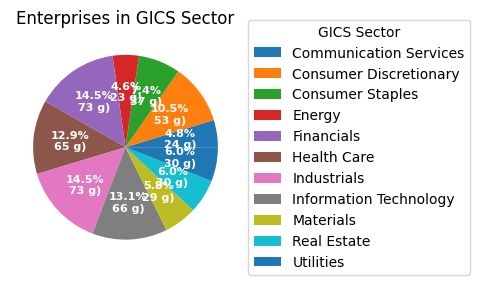

In [36]:
#Plot.
fig, ax = plt.subplots(figsize = (6, 3), subplot_kw = dict(aspect = 'equal'))

#Function to autopct argument, which will expand automatic percentage labeling by showing absolute values.
def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n{absolute:d} g)"

wedges, texts, autotexts = ax.pie(x, autopct = lambda pct: func(pct, x), textprops = dict(color = 'w'))

ax.legend(wedges, y, title = 'GICS Sector', loc = "center left", bbox_to_anchor = (1, 0, 0.5, 1))

plt.setp(autotexts, size = 8, weight = "bold")

ax.set_title("Enterprises in GICS Sector")

plt.show()

Consumer Discretionary Pie Graph

In [37]:
#Count number of indices in each sub-industry of "Consumer Discretionary" Sector.
group2 = ticker.query('`GICS Sector` == "Consumer Discretionary"').groupby(by = 'GICS Sub-Industry')['Symbol'].count()
group2

GICS Sub-Industry
Apparel Retail                         2
Apparel, Accessories & Luxury Goods    4
Automobile Manufacturers               3
Automotive Parts & Equipment           2
Automotive Retail                      2
Casinos & Gaming                       4
Computer & Electronics Retail          1
Consumer Electronics                   1
Distributors                           2
Home Furnishings                       1
Home Improvement Retail                2
Homebuilding                           4
Hotels, Resorts & Cruise Lines         5
Household Appliances                   1
Housewares & Specialties               1
Internet & Direct Marketing Retail     5
Leisure Products                       1
Restaurants                            6
Specialty Stores                       6
Name: Symbol, dtype: int64

In [38]:
#Data.
x = group2.tolist()
y = group2.index.tolist()

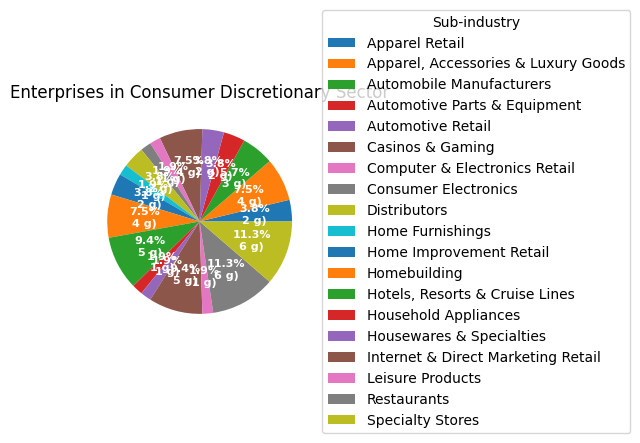

In [39]:
#Plot.
fig, ax = plt.subplots(figsize = (6, 3), subplot_kw = dict(aspect = 'equal'))

wedges, texts, autotexts = ax.pie(x, autopct = lambda pct: func(pct, x), textprops = dict(color = 'w'))

ax.legend(wedges, y, title = 'Sub-industry', loc = "center left", bbox_to_anchor = (1, 0, 0.5, 1))

plt.setp(autotexts, size = 8, weight = "bold")

ax.set_title("Enterprises in Consumer Discretionary Sector")

plt.show()

Consumer Discretionary Sector

a) Internet & Direct Marketing Retail

b) Apparel, Accessories & Luxury Goods

c) Restaurants

In [40]:
#Available options
sector = ticker.query("`GICS Sector` == 'Consumer Discretionary'", inplace = False)
sector['GICS Sub-Industry'].unique()

array(['Automotive Retail', 'Internet & Direct Marketing Retail',
       'Automotive Parts & Equipment', 'Specialty Stores',
       'Computer & Electronics Retail', 'Casinos & Gaming',
       'Hotels, Resorts & Cruise Lines', 'Restaurants', 'Homebuilding',
       'Automobile Manufacturers', 'Consumer Electronics',
       'Leisure Products', 'Home Improvement Retail', 'Distributors',
       'Home Furnishings', 'Housewares & Specialties',
       'Apparel, Accessories & Luxury Goods', 'Apparel Retail',
       'Household Appliances'], dtype=object)

In [41]:
sub_industry = sector.query("`GICS Sub-Industry` == 'Restaurants'")
sub_industry

Symbol                Security             GICS Sector GICS Sub-Industry  \
106    CMG  Chipotle Mexican Grill  Consumer Discretionary       Restaurants   
141    DRI      Darden Restaurants  Consumer Discretionary       Restaurants   
156    DPZ                Domino's  Consumer Discretionary       Restaurants   
309    MCD              McDonald's  Consumer Discretionary       Restaurants   
427   SBUX               Starbucks  Consumer Discretionary       Restaurants   
498    YUM             Yum! Brands  Consumer Discretionary       Restaurants   

         Headquarters Location  Date added      CIK Founded  
106  Newport Beach, California  2011-04-28  1058090    1993  
141           Orlando, Florida  1995-05-31   940944    1938  
156        Ann Arbor, Michigan  2020-05-12  1286681    1960  
309          Chicago, Illinois  1970-06-30    63908    1940  
427        Seattle, Washington  2000-06-07   829224    1971  
498       Louisville, Kentucky  1997-10-06  1041061    1997

In [42]:
si_tickers = ['AMZN', 'EBAY', 'BKNG', 'NKE', 'VFC', 'RL', 'DPZ', 'MCD', 'SBUX']

DPZ - Dominos Pizza
MCD - McDonalds Corp
SBUX - Starbucks Corp

In [43]:
#Let's download the data from the Yahoo site with yfinance.
amzn = yf.download('AMZN', start, end)
ebay = yf.download('EBAY', start, end)
bkng = yf.download('BKNG', start, end)
nke = yf.download('NKE', start, end)
vfc = yf.download('VFC', start, end)
rl = yf.download('RL', start, end)
dpz = yf.download('DPZ', start, end)
mcd = yf.download('MCD', start, end)
sbux = yf.download('SBUX', start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


## Internet & Direct Marketing Retail

Statistics

In [44]:
#Statistics
amzn.describe()

Open         High          Low        Close    Adj Close  \
count  6430.000000  6430.000000  6430.000000  6430.000000  6430.000000   
mean     30.769427    31.135191    30.365708    30.755777    30.755777   
std      47.852666    48.407629    47.229506    47.814268    47.814268   
min       0.070313     0.072396     0.065625     0.069792     0.069792   
25%       1.980875     2.017375     1.945625     1.990000     1.990000   
50%       6.251500     6.349500     6.145000     6.246000     6.246000   
75%      36.949499    37.165625    36.547376    36.868751    36.868751   
max     187.199997   188.654007   184.839493   186.570496   186.570496   

             Volume  
count  6.430000e+03  
mean   1.435194e+08  
std    1.408139e+08  
min    9.744000e+06  
25%    6.946350e+07  
50%    1.066290e+08  
75%    1.618880e+08  
max    2.086584e+09

In [45]:
ebay.describe()

Open         High          Low        Close    Adj Close  \
count  6087.000000  6087.000000  6087.000000  6087.000000  6087.000000   
mean     21.572381    21.870688    21.286254    21.577305    20.452487   
std      15.787428    15.968497    15.620063    15.788497    15.295568   
min       0.488829     0.512942     0.442796     0.508558     0.476718   
25%       9.841119    10.014730     9.700126     9.869529     9.251613   
50%      16.376263    16.582493    16.132154    16.363636    15.339135   
75%      29.389999    29.775000    28.940001    29.389999    27.568683   
max      80.970001    81.190002    79.900002    80.589996    78.453239   

             Volume  
count  6.087000e+03  
mean   3.464157e+07  
std    3.383794e+07  
min    2.129200e+06  
25%    1.200965e+07  
50%    2.781797e+07  
75%    4.482253e+07  
max    5.776987e+08

In [46]:
bkng.describe()

Open         High          Low        Close    Adj Close  \
count  5958.000000  5958.000000  5958.000000  5958.000000  5958.000000   
mean    788.348090   798.362078   777.698220   787.878721   787.878721   
std     793.528071   802.262533   784.639457   793.322190   793.322190   
min       6.600000     7.140000     6.300000     6.600000     6.600000   
25%      40.634999    41.309999    39.892500    40.703125    40.703125   
50%     482.929993   492.000000   473.615005   482.985001   482.985001   
75%    1475.074982  1484.367523  1462.024963  1472.994995  1472.994995   
max    2680.000000  2715.659912  2632.219971  2703.260010  2703.260010   

             Volume  
count  5.958000e+03  
mean   7.619759e+05  
std    7.518370e+05  
min    3.698300e+04  
25%    3.585250e+05  
50%    5.572585e+05  
75%    9.210750e+05  
max    1.583610e+07

Volume

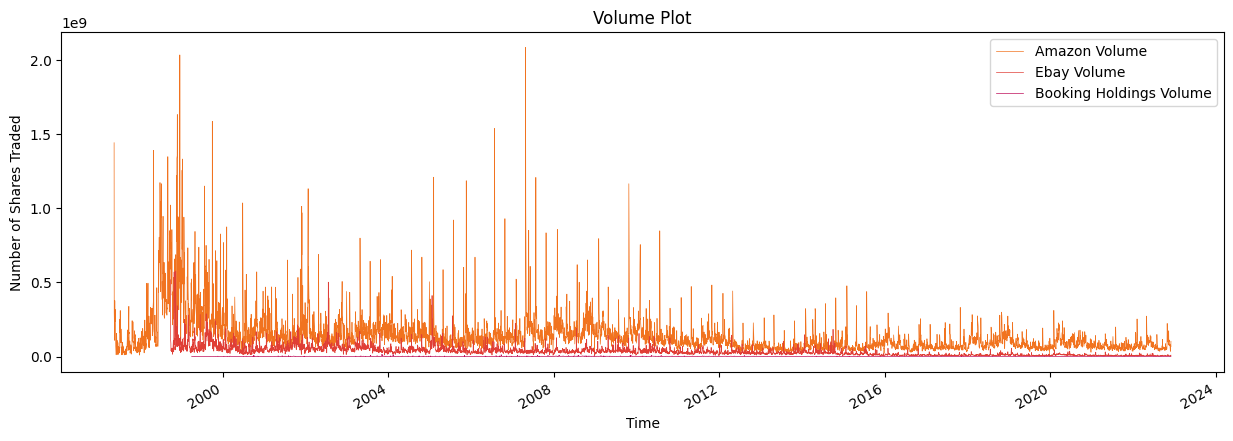

In [47]:
#Comparison volume plots
amzn['Volume'].plot(label = 'Amazon Volume', figsize = (15, 5), linewidth = 0.5, color = '#f1731f')
ebay['Volume'].plot(label = 'Ebay Volume', linewidth = 0.5, color = '#e03e36')
bkng['Volume'].plot(label = 'Booking Holdings Volume', linewidth = 0.5, color = '#bd0d59')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Number of Shares Traded')
plt.title('Volume Plot')

plt.show()

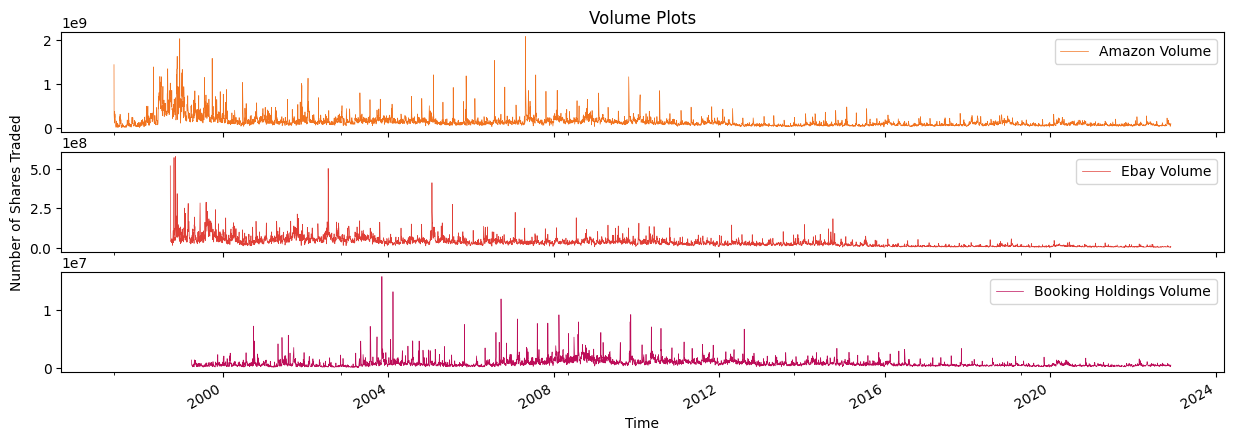

In [48]:
#Comparison volume plots
ax1 = plt.subplot(3, 1, 1)
amzn['Volume'].plot(label = 'Amazon Volume', figsize = (15, 5), linewidth = 0.5, color = '#f1731f')
plt.title('Volume Plots')
plt.legend()

ax2 = plt.subplot(3, 1, 2, sharex = ax1)
ebay['Volume'].plot(label = 'Ebay Volume', linewidth = 0.5, color = '#e03e36')
plt.ylabel('Number of Shares Traded')
plt.legend()

ax3 = plt.subplot(3, 1, 3, sharex = ax1)
bkng['Volume'].plot(label = 'Booking Holdings Volume', linewidth = 0.5, color = '#bd0d59')
plt.xlabel('Time')
plt.legend()

plt.show()

OHLC

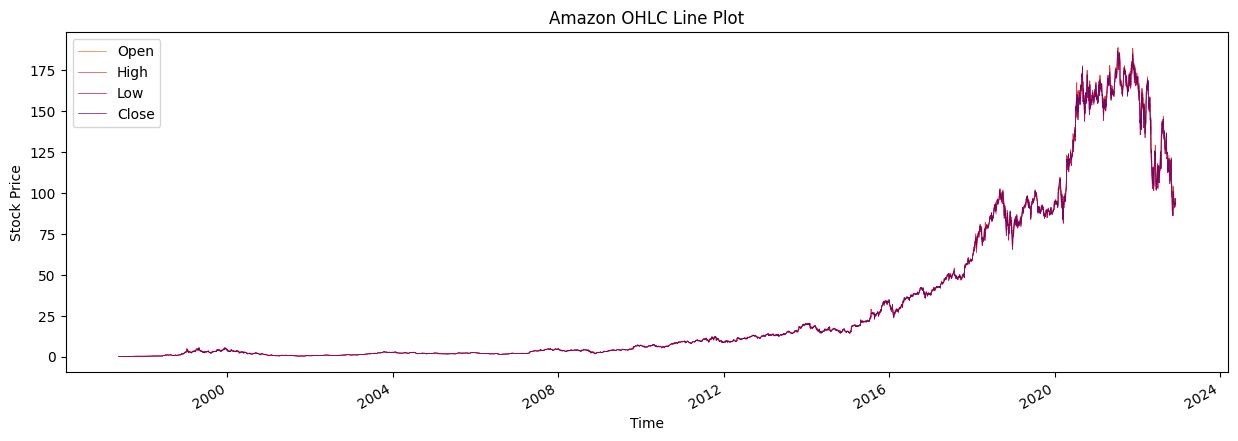

In [49]:
#Amazon OHLC Plot 1997-2022
amzn['Open'].plot(label = 'Open', figsize = (15, 5), linewidth = 0.5, color = '#f1731f')
amzn['High'].plot(label = 'High', linewidth = 0.5, color = '#e03e36')
amzn['Low'].plot(label = 'Low', linewidth = 0.5, color = '#bd0d59')
amzn['Close'].plot(label = 'Close', linewidth = 0.5, color = '#730662')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Amazon OHLC Line Plot')

plt.show()

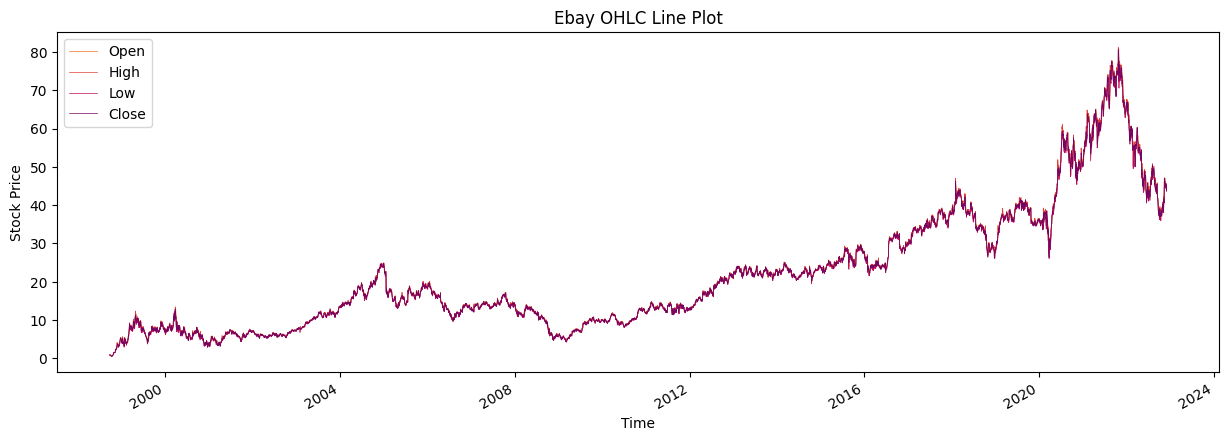

In [50]:
#Ebay OHLC Plot 1998-2022
ebay['Open'].plot(label = 'Open', figsize = (15, 5), linewidth = 0.5, color = '#f1731f')
ebay['High'].plot(label = 'High', linewidth = 0.5, color = '#e03e36')
ebay['Low'].plot(label = 'Low', linewidth = 0.5, color = '#bd0d59')
ebay['Close'].plot(label = 'Close', linewidth = 0.5, color = '#730662')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Ebay OHLC Line Plot')

plt.show()

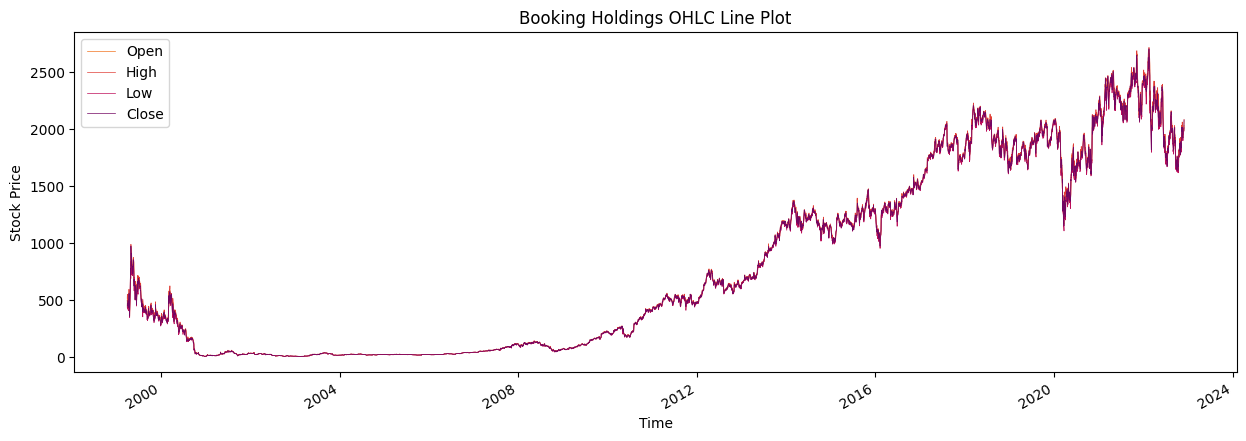

In [51]:
#Booking Holdings OHLC Plot 1999-2022
bkng['Open'].plot(label = 'Open', figsize = (15, 5), linewidth = 0.5, color = '#f1731f')
bkng['High'].plot(label = 'High', linewidth = 0.5, color = '#e03e36')
bkng['Low'].plot(label = 'Low', linewidth = 0.5, color = '#bd0d59')
bkng['Close'].plot(label = 'Close', linewidth = 0.5, color = '#730662')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Booking Holdings OHLC Line Plot')

plt.show()

Market Capitalization

In [52]:
amzn['Total Traded'] = amzn['Adj Close'] * amzn['Volume']
ebay['Total Traded'] = ebay['Adj Close'] * ebay['Volume'] 
bkng['Total Traded'] = bkng['Adj Close'] * bkng['Volume'] 

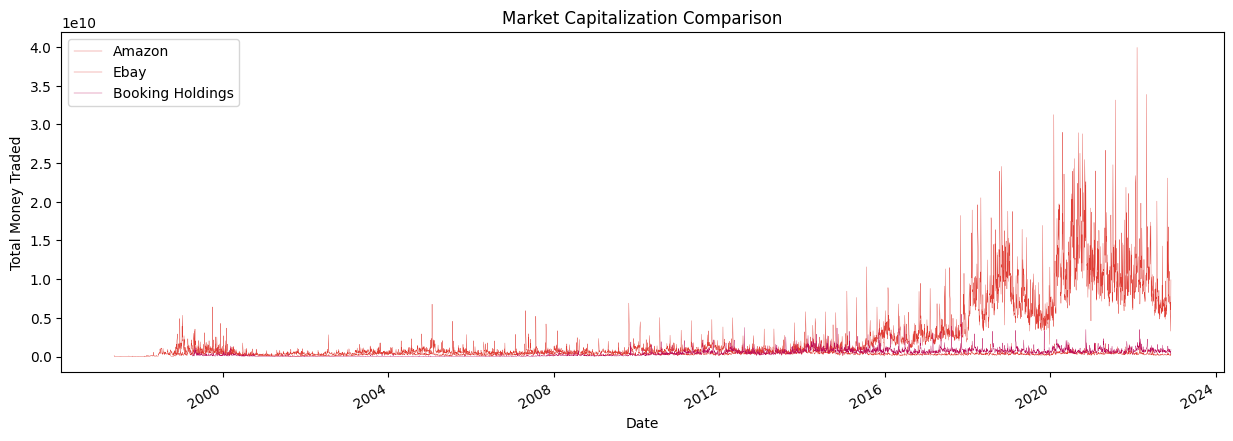

In [53]:
amzn['Total Traded'].plot(label = 'Amazon', xlabel = 'Time', ylabel = 'Total Money Traded', figsize = (15,5), linewidth = 0.25, title = '', color = '#e03e36')
ebay['Total Traded'].plot(label = 'Ebay', linewidth = 0.25, title = '', color = '#e03e36')
bkng['Total Traded'].plot(label = 'Booking Holdings', linewidth = 0.25, title = '', color = '#bd0d59')

plt.legend()
plt.title('Market Capitalization Comparison')
plt.show()

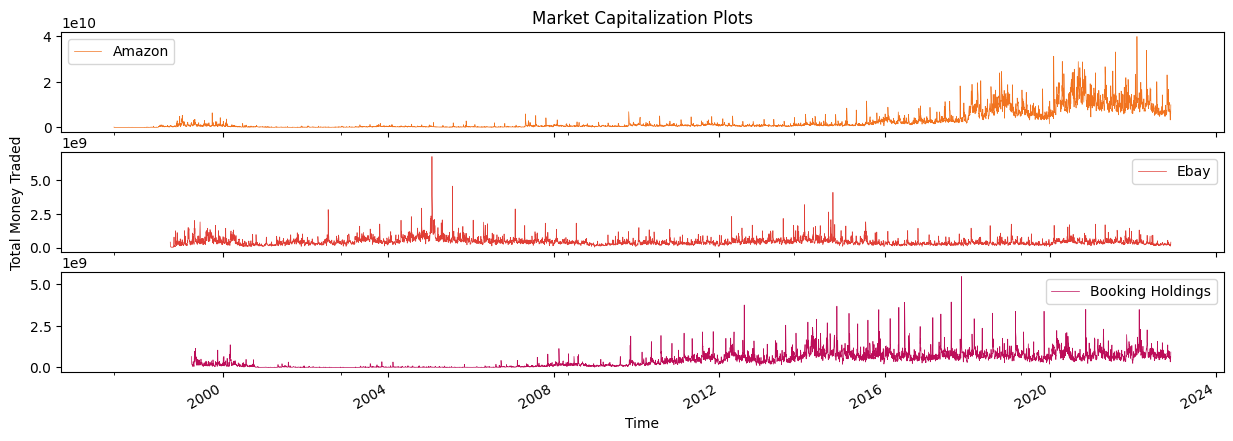

In [54]:
#Comparison Market Capitalization plots
ax1 = plt.subplot(3, 1, 1)
amzn['Total Traded'].plot(label = 'Amazon', figsize = (15, 5), linewidth = 0.5, color = '#f1731f')
plt.title('Market Capitalization Plots')
plt.legend()

ax2 = plt.subplot(3, 1, 2, sharex = ax1)
ebay['Total Traded'].plot(label = 'Ebay', linewidth = 0.5, color = '#e03e36')
plt.ylabel('Total Money Traded')
plt.legend()

ax3 = plt.subplot(3, 1, 3, sharex = ax1)
bkng['Total Traded'].plot(label = 'Booking Holdings', linewidth = 0.5, color = '#bd0d59')
plt.xlabel('Time')
plt.legend()

plt.show()

Moving Average

In [55]:
amzn['Mov Av 80'] = amzn['Adj Close'].rolling(80).mean()
ebay['Mov Av 80'] = ebay['Adj Close'].rolling(80).mean()
bkng['Mov Av 80'] = bkng['Adj Close'].rolling(80).mean()

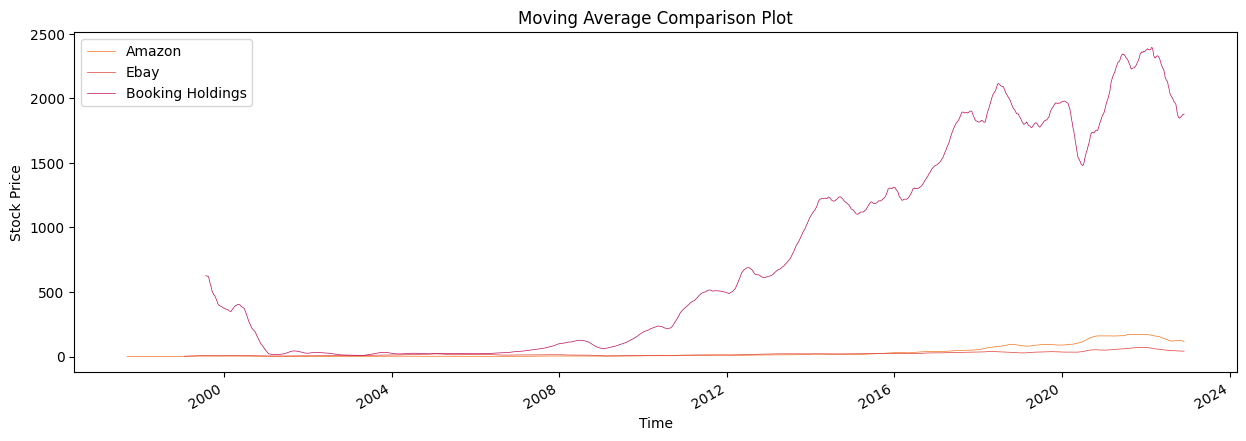

In [56]:
#Moving Average Comparison Plot
amzn['Mov Av 80'].plot(label = 'Amazon', figsize = (15, 5), linewidth = 0.5, color = '#f1731f')
ebay['Mov Av 80'].plot(label = 'Ebay', linewidth = 0.5, color = '#e03e36')
bkng['Mov Av 80'].plot(label = 'Booking Holdings', linewidth = 0.5, color = '#bd0d59')

plt.legend()
plt.title('Moving Average Comparison Plot')
plt.ylabel('Stock Price')
plt.xlabel('Time')
plt.show()

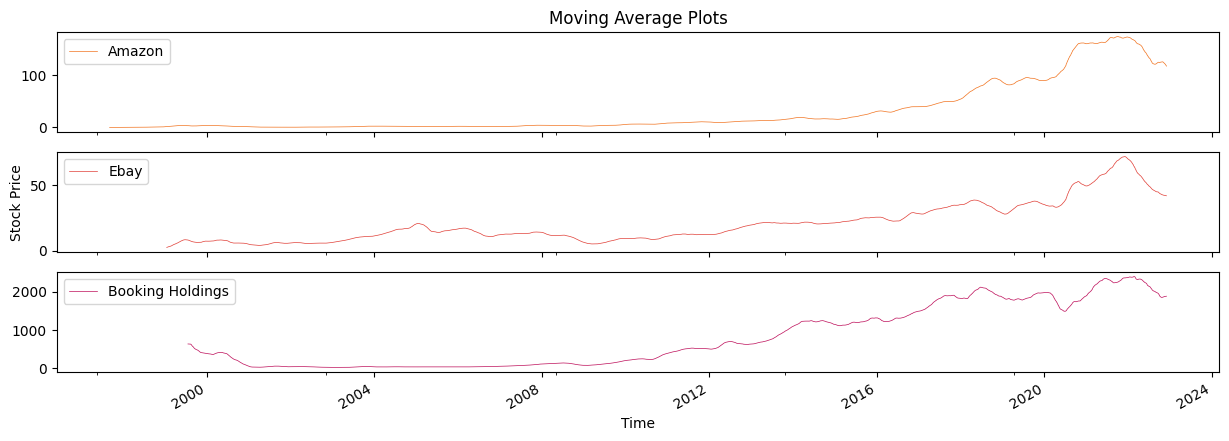

In [57]:
#Moving Average Plots
ax1 = plt.subplot(3, 1, 1)
amzn['Mov Av 80'].plot(label = 'Amazon', figsize = (15, 5), linewidth = 0.5, color = '#f1731f')
plt.title('Moving Average Plots')
plt.legend()

ax2 = plt.subplot(3, 1, 2, sharex = ax1)
ebay['Mov Av 80'].plot(label = 'Ebay', linewidth = 0.5, color = '#e03e36')
plt.ylabel('Stock Price')
plt.legend()

ax3 = plt.subplot(3, 1, 3, sharex = ax1)
bkng['Mov Av 80'].plot(label = 'Booking Holdings', linewidth = 0.5, color = '#bd0d59')
plt.xlabel('Time')
plt.legend()

plt.show()

Daily Percentage Change

In [58]:
#Percent Returns
amzn['Returns'] = (amzn['Adj Close']/amzn['Adj Close'].shift(1))-1
ebay['Returns'] = (ebay['Adj Close']/ebay['Adj Close'].shift(1))-1
bkng['Returns'] = (bkng['Adj Close']/bkng['Adj Close'].shift(1))-1

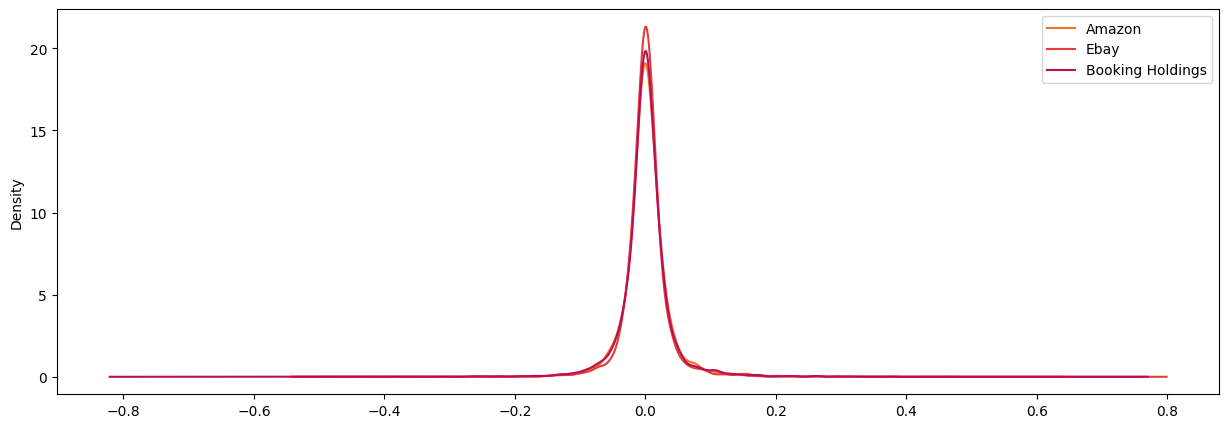

In [59]:
#Volatility with a Kernel Density Estimate Graph
amzn['Returns'].plot(kind = 'kde', label = 'Amazon', figsize = (15, 5), color = '#f1731f')
ebay['Returns'].plot(kind = 'kde', label = 'Ebay', color = '#e03e36')
bkng['Returns'].plot(kind = 'kde', label = 'Booking Holdings', color = '#bd0d59')

plt.legend()
plt.show()

Scatter Matrix

In [60]:
marketing_retail = pd.concat([amzn['Adj Close'], ebay['Adj Close'], bkng['Adj Close']], axis = 1)
marketing_retail.columns = ['Amazon Adj Close', 'Ebay Adj Close', 'Booking Holdings']

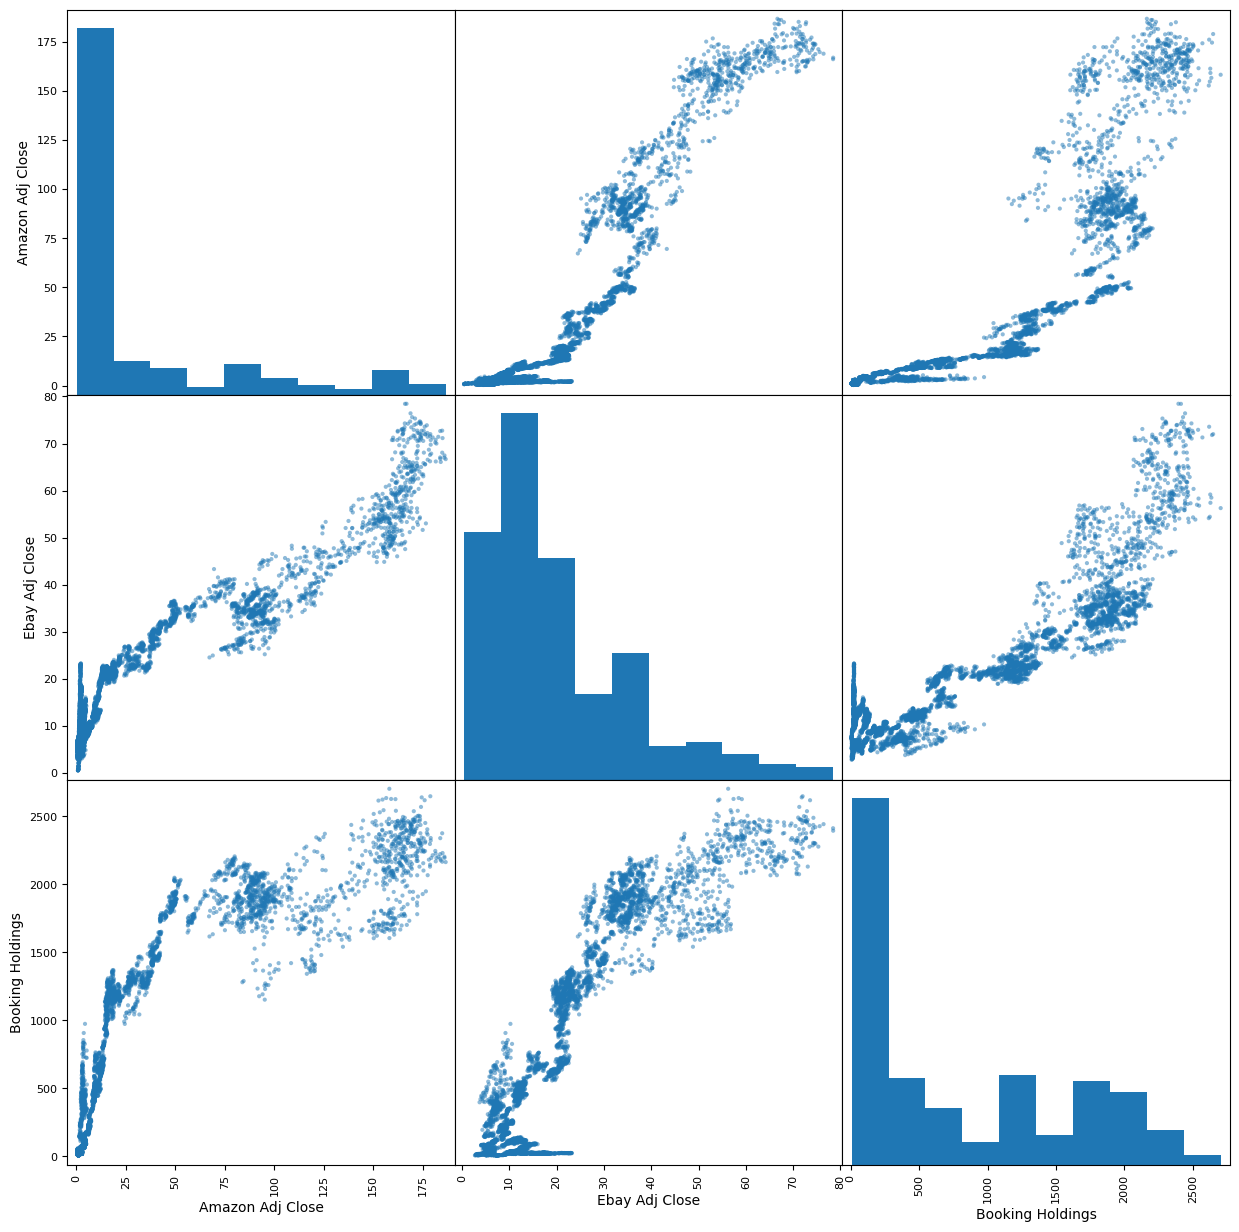

In [61]:
scatter_matrix(marketing_retail, figsize = (15, 15))
plt.show()

* Amazon

## Apparel, Accessories & Luxury Goods

Statistics

In [62]:
#Statistics
nke.describe()

Open         High          Low        Close    Adj Close  \
count  8294.000000  8294.000000  8294.000000  8294.000000  8294.000000   
mean     29.266002    29.570762    28.959928    29.268585    27.263190   
std      37.790768    38.167191    37.392543    37.773402    37.216832   
min       0.757813     0.789063     0.750000     0.757813     0.570718   
25%       5.465938     5.557813     5.375000     5.476563     4.284177   
50%      10.849375    10.937500    10.772500    10.851250     8.765478   
75%      40.056250    40.327500    39.813749    40.046251    36.557825   
max     176.350006   179.100006   175.500000   177.509995   174.809555   

             Volume  
count  8.294000e+03  
mean   1.115906e+07  
std    8.443164e+06  
min    1.062400e+06  
25%    6.457600e+06  
50%    8.998800e+06  
75%    1.304120e+07  
max    1.574456e+08

In [63]:
vfc.describe()

Open         High          Low        Close    Adj Close  \
count  8294.000000  8294.000000  8294.000000  8294.000000  8294.000000   
mean     27.605714    27.899283    27.300299    27.606612    21.772008   
std      26.278324    26.536380    26.004887    26.269863    23.868739   
min       1.368291     1.500706     1.368291     1.412429     0.599502   
25%       7.604314     7.698476     7.532957     7.635946     3.955122   
50%      13.619350    13.784134    13.478107    13.646422     8.677159   
75%      50.508476    51.016949    49.969398    50.468107    42.409144   
max     100.000000   100.250000    99.639999   100.230003    89.418526   

             Volume  
count  8.294000e+03  
mean   2.275500e+06  
std    1.775933e+06  
min    8.411000e+04  
25%    1.104268e+06  
50%    1.828339e+06  
75%    2.932288e+06  
max    2.890127e+07

In [64]:
rl.describe()

Open         High          Low        Close    Adj Close  \
count  6411.000000  6411.000000  6411.000000  6411.000000  6411.000000   
mean     80.295262    81.373385    79.204132    80.299994    68.895937   
std      48.350619    48.815828    47.880444    48.339877    42.502078   
min      12.750000    13.562500    12.750000    13.250000    10.475994   
25%      29.750000    30.125000    29.312500    29.785000    23.566357   
50%      78.599998    79.669998    77.489998    78.470001    66.669579   
75%     117.000000   118.350002   115.099998   116.935001   105.862934   
max     189.279999   192.029999   187.910004   189.559998   158.565674   

             Volume  
count  6.411000e+03  
mean   8.936411e+05  
std    8.545309e+05  
min    1.670000e+04  
25%    3.889500e+05  
50%    7.331000e+05  
75%    1.143700e+06  
max    1.996380e+07

Volume

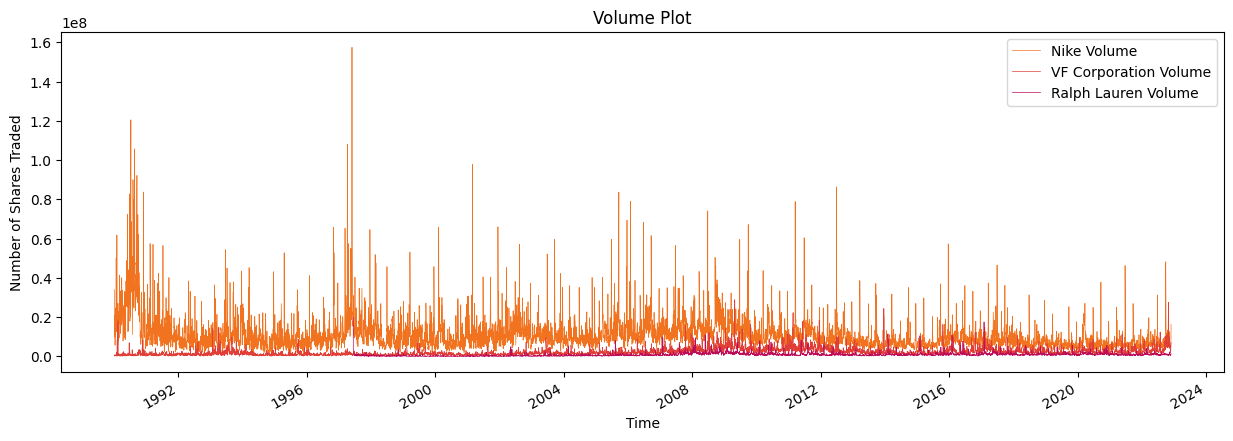

In [65]:
#Comparison volume plots
nke['Volume'].plot(label = 'Nike Volume', figsize = (15, 5), linewidth = 0.5, color = '#f1731f')
vfc['Volume'].plot(label = 'VF Corporation Volume', linewidth = 0.5, color = '#e03e36')
rl['Volume'].plot(label = 'Ralph Lauren Volume', linewidth = 0.5, color = '#bd0d59')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Number of Shares Traded')
plt.title('Volume Plot')

plt.show()

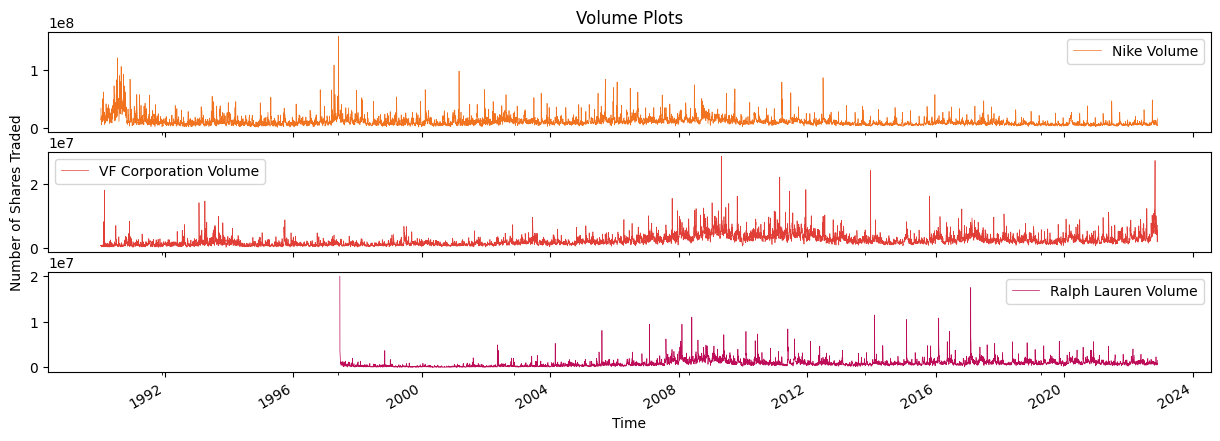

In [66]:
#Comparison volume plots
ax1 = plt.subplot(3, 1, 1)
nke['Volume'].plot(label = 'Nike Volume', figsize = (15, 5), linewidth = 0.5, color = '#f1731f')
plt.title('Volume Plots')
plt.legend()

ax2 = plt.subplot(3, 1, 2, sharex = ax1)
vfc['Volume'].plot(label = 'VF Corporation Volume', linewidth = 0.5, color = '#e03e36')
plt.ylabel('Number of Shares Traded')
plt.legend()

ax3 = plt.subplot(3, 1, 3, sharex = ax1)
rl['Volume'].plot(label = 'Ralph Lauren Volume', linewidth = 0.5, color = '#bd0d59')
plt.xlabel('Time')
plt.legend()

plt.show()

OHLC

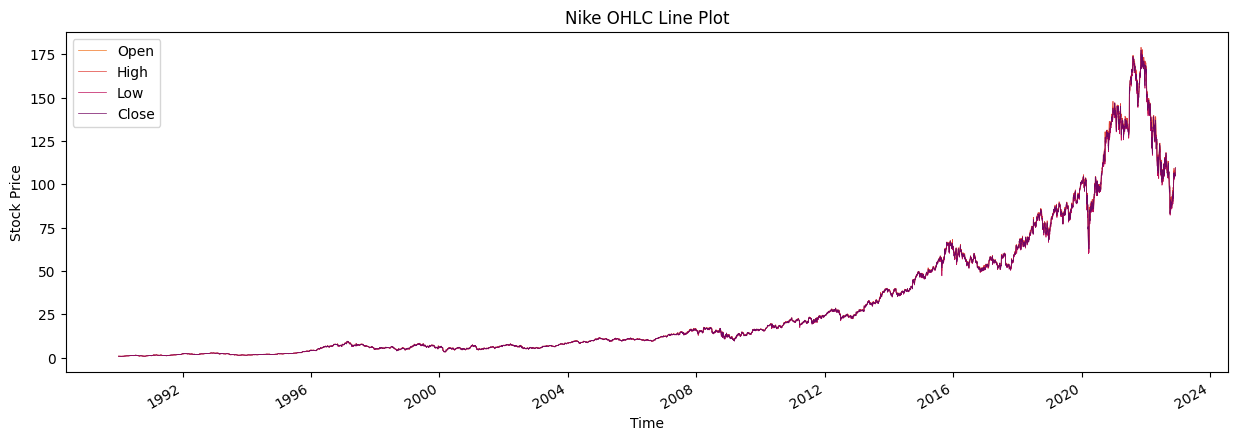

In [67]:
#Nike OHLC Plot 1997-2022
nke['Open'].plot(label = 'Open', figsize = (15, 5), linewidth = 0.5, color = '#f1731f')
nke['High'].plot(label = 'High', linewidth = 0.5, color = '#e03e36')
nke['Low'].plot(label = 'Low', linewidth = 0.5, color = '#bd0d59')
nke['Close'].plot(label = 'Close', linewidth = 0.5, color = '#730662')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Nike OHLC Line Plot')

plt.show()

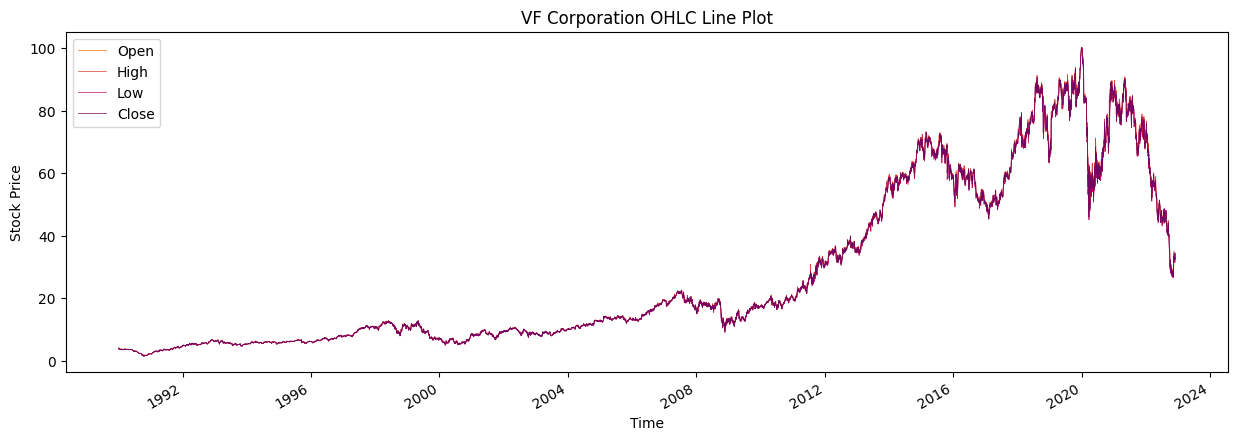

In [68]:
#VF Corporation OHLC Plot 1998-2022
vfc['Open'].plot(label = 'Open', figsize = (15, 5), linewidth = 0.5, color = '#f1731f')
vfc['High'].plot(label = 'High', linewidth = 0.5, color = '#e03e36')
vfc['Low'].plot(label = 'Low', linewidth = 0.5, color = '#bd0d59')
vfc['Close'].plot(label = 'Close', linewidth = 0.5, color = '#730662')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('VF Corporation OHLC Line Plot')

plt.show()

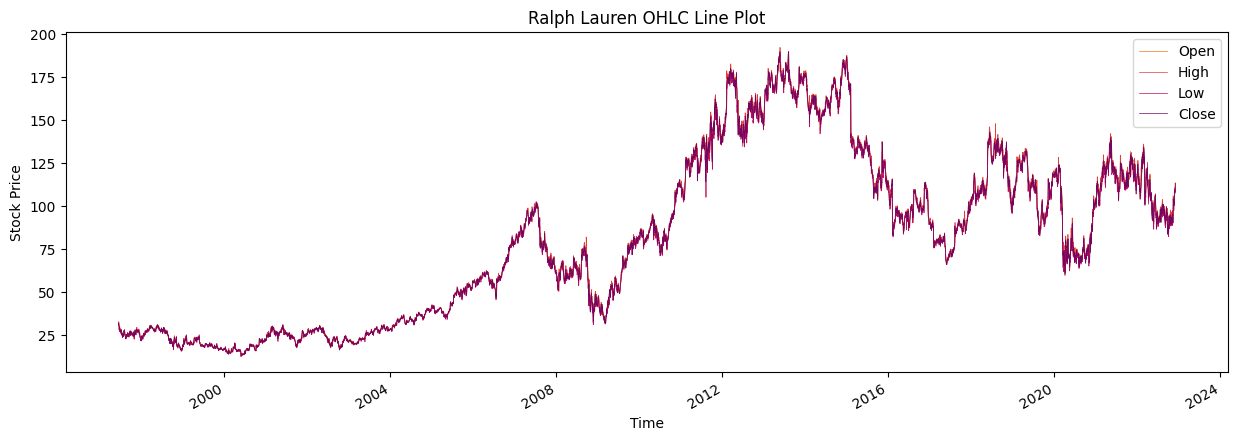

In [69]:
#Ralph Lauren OHLC Plot 1999-2022
rl['Open'].plot(label = 'Open', figsize = (15, 5), linewidth = 0.5, color = '#f1731f')
rl['High'].plot(label = 'High', linewidth = 0.5, color = '#e03e36')
rl['Low'].plot(label = 'Low', linewidth = 0.5, color = '#bd0d59')
rl['Close'].plot(label = 'Close', linewidth = 0.5, color = '#730662')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Ralph Lauren OHLC Line Plot')

plt.show()

Market Capitalization

In [70]:
nke['Total Traded'] = nke['Adj Close'] * nke['Volume']
vfc['Total Traded'] = vfc['Adj Close'] * vfc['Volume'] 
rl['Total Traded'] = rl['Adj Close'] * rl['Volume'] 

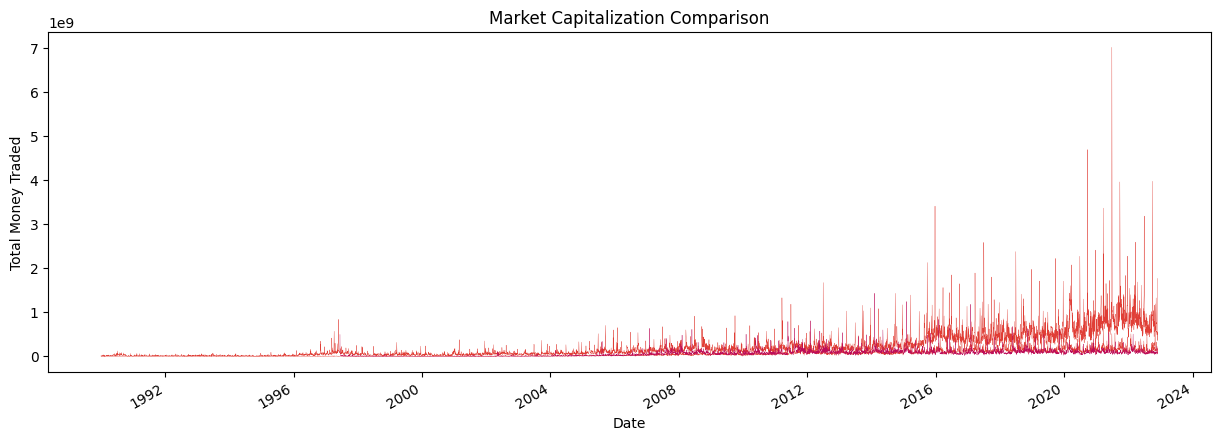

In [71]:
nke['Total Traded'].plot(label = 'Nike', xlabel = 'Time', ylabel = 'Total Money Traded', figsize = (15,5), linewidth = 0.25, title = '', color = '#e03e36')
vfc['Total Traded'].plot(label = 'VF Corporation', linewidth = 0.25, title = '', color = '#e03e36')
rl['Total Traded'].plot(label = 'Ralph Lauren', linewidth = 0.25, title = '', color = '#bd0d59')

plt.title('Market Capitalization Comparison')
plt.show()

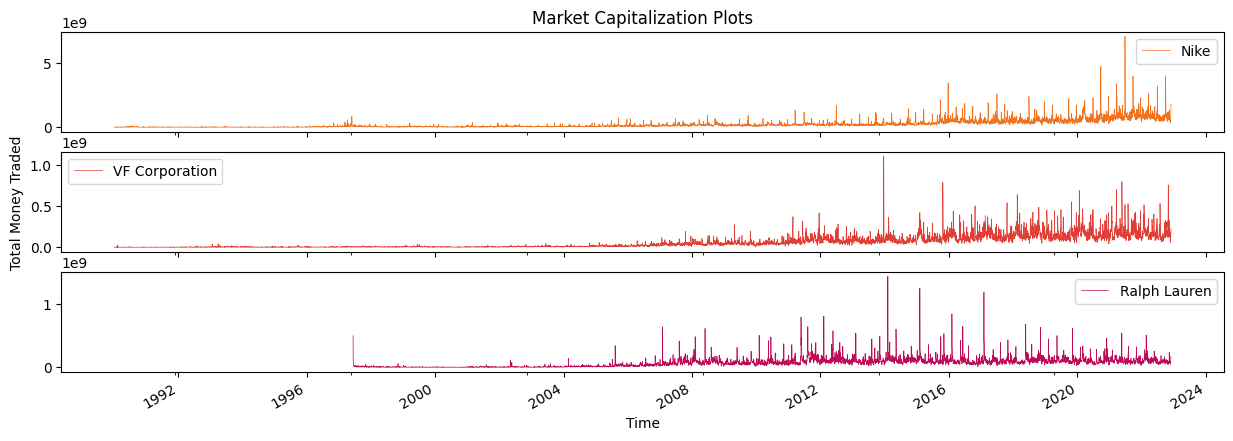

In [72]:
#Comparison Market Capitalization plots
ax1 = plt.subplot(3, 1, 1)
nke['Total Traded'].plot(label = 'Nike', figsize = (15, 5), linewidth = 0.5, color = '#f1731f')
plt.title('Market Capitalization Plots')
plt.legend()

ax2 = plt.subplot(3, 1, 2, sharex = ax1)
vfc['Total Traded'].plot(label = 'VF Corporation', linewidth = 0.5, color = '#e03e36')
plt.ylabel('Total Money Traded')
plt.legend()

ax3 = plt.subplot(3, 1, 3, sharex = ax1)
rl['Total Traded'].plot(label = 'Ralph Lauren', linewidth = 0.5, color = '#bd0d59')
plt.xlabel('Time')
plt.legend()

plt.show()

Moving Average

In [73]:
nke['Mov Av 80'] = nke['Adj Close'].rolling(80).mean()
vfc['Mov Av 80'] = vfc['Adj Close'].rolling(80).mean()
rl['Mov Av 80'] = rl['Adj Close'].rolling(80).mean()

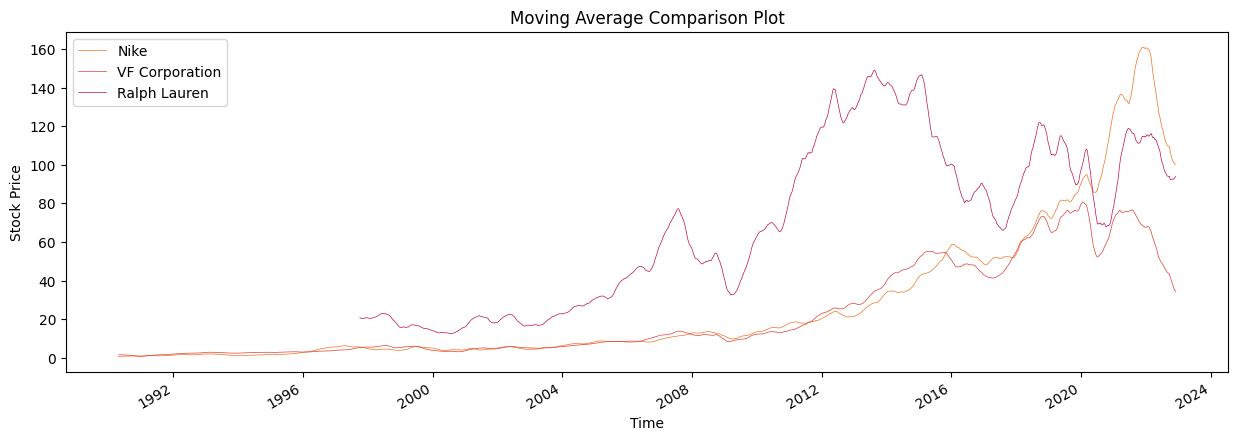

In [74]:
#Moving Average Comparison Plot
nke['Mov Av 80'].plot(label = 'Nike', figsize = (15, 5), linewidth = 0.5, color = '#f1731f')
vfc['Mov Av 80'].plot(label = 'VF Corporation', linewidth = 0.5, color = '#e03e36')
rl['Mov Av 80'].plot(label = 'Ralph Lauren', linewidth = 0.5, color = '#bd0d59')

plt.legend()
plt.title('Moving Average Comparison Plot')
plt.ylabel('Stock Price')
plt.xlabel('Time')
plt.show()

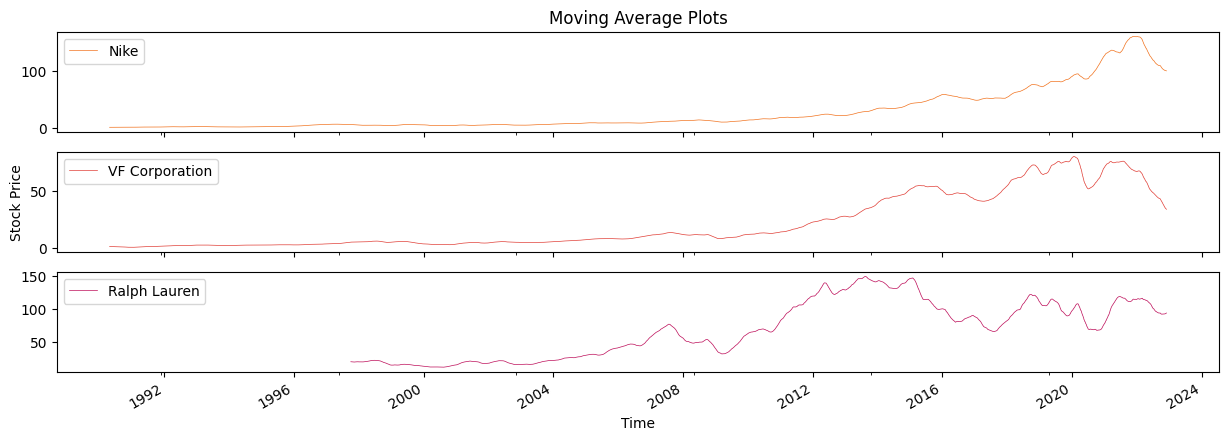

In [75]:
#Moving Average Plots
ax1 = plt.subplot(3, 1, 1)
nke['Mov Av 80'].plot(label = 'Nike', figsize = (15, 5), linewidth = 0.5, color = '#f1731f')
plt.title('Moving Average Plots')
plt.legend()

ax2 = plt.subplot(3, 1, 2, sharex = ax1)
vfc['Mov Av 80'].plot(label = 'VF Corporation', linewidth = 0.5, color = '#e03e36')
plt.ylabel('Stock Price')
plt.legend()

ax3 = plt.subplot(3, 1, 3, sharex = ax1)
rl['Mov Av 80'].plot(label = 'Ralph Lauren', linewidth = 0.5, color = '#bd0d59')
plt.xlabel('Time')
plt.legend()

plt.show()

Daily Percentage Change

In [76]:
#Percent Returns
nke['Returns'] = (nke['Adj Close']/nke['Adj Close'].shift(1))-1
vfc['Returns'] = (vfc['Adj Close']/vfc['Adj Close'].shift(1))-1
rl['Returns'] = (rl['Adj Close']/rl['Adj Close'].shift(1))-1

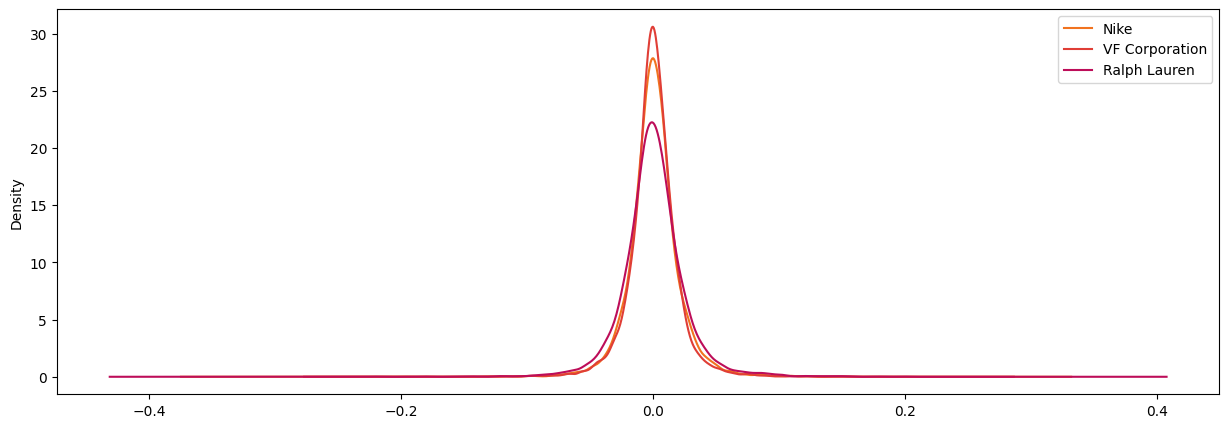

In [77]:
#Volatility with a Kernel Density Estimate Graph
nke['Returns'].plot(kind = 'kde', label = 'Nike', figsize = (15, 5), color = '#f1731f')
vfc['Returns'].plot(kind = 'kde', label = 'VF Corporation', color = '#e03e36')
rl['Returns'].plot(kind = 'kde', label = 'Ralph Lauren', color = '#bd0d59')

plt.legend()
plt.show()

Scatter Matrix

In [78]:
luxury = pd.concat([nke['Adj Close'], vfc['Adj Close'], rl['Adj Close']], axis = 1)
luxury.columns = ['Nike Adj Close', 'VF Corporation Adj Close', 'Ralph Lauren Adj Close']

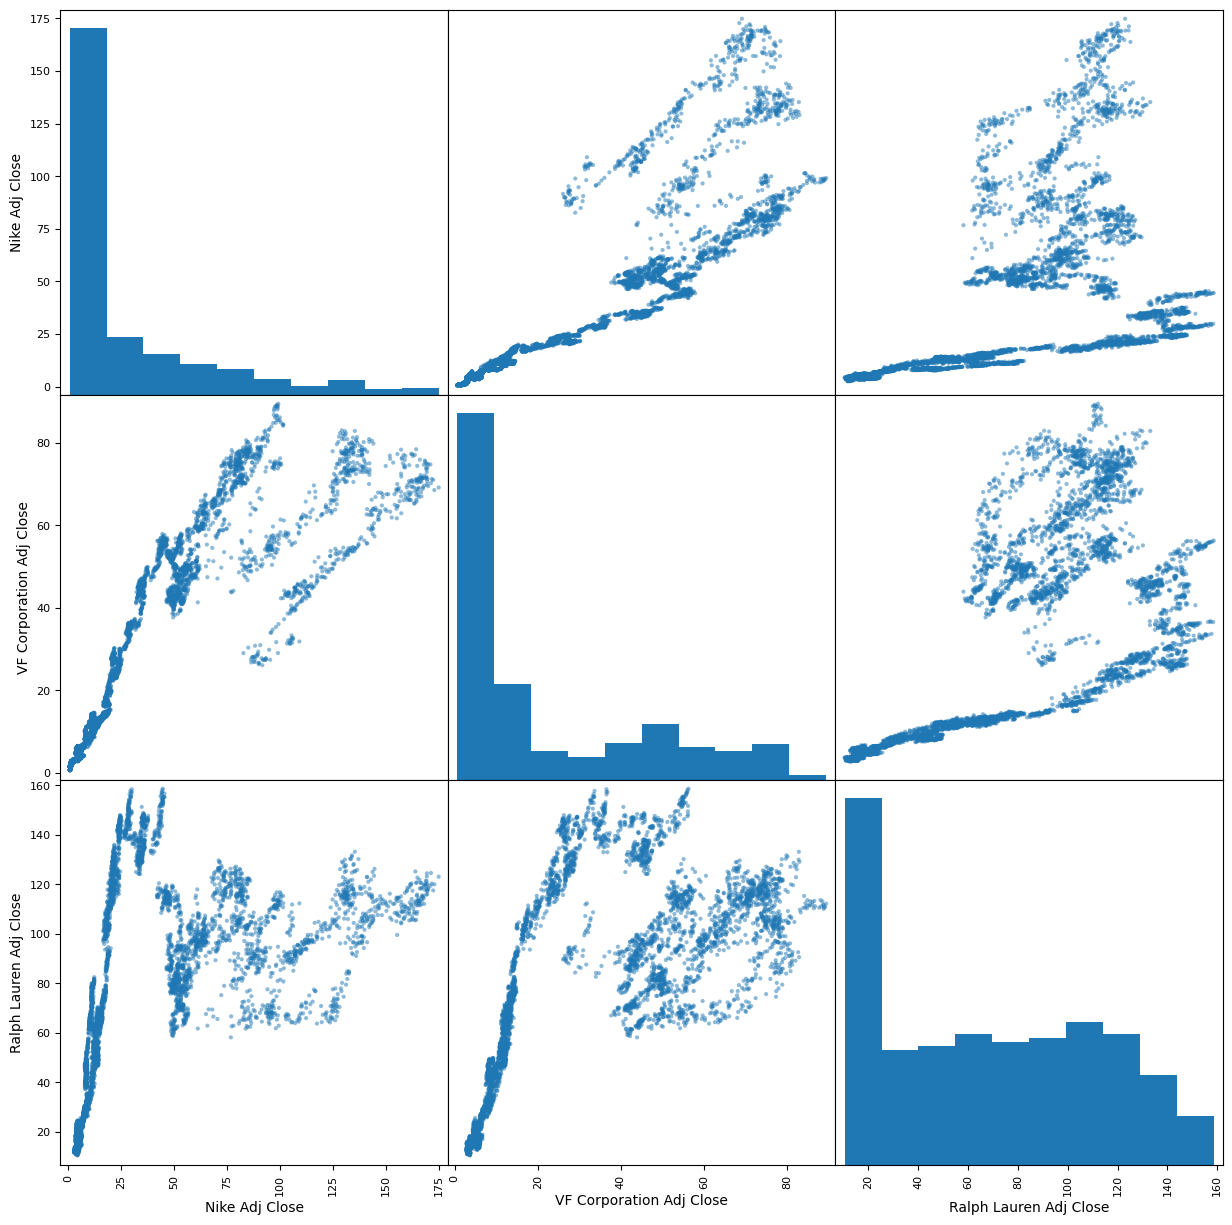

In [79]:
scatter_matrix(luxury, figsize = (15, 15))
plt.show()

* Nike

## Restaurants

Statistics

In [80]:
#Statistics
dpz.describe()

Open         High          Low        Close    Adj Close  \
count  4631.000000  4631.000000  4631.000000  4631.000000  4631.000000   
mean    132.184537   133.817292   130.620594   132.255377   124.941379   
std     143.494962   145.348940   141.726169   143.543500   142.255232   
min       2.920000     3.060000     2.610000     2.830000     2.348570   
25%      18.724999    18.884999    18.550000    18.680000    11.807804   
50%      66.610001    67.209999    65.930000    66.629997    60.377884   
75%     233.175003   235.919998   230.610001   232.659996   222.893585   
max     563.880005   567.570007   557.400024   564.330017   555.405518   

             Volume  
count  4.631000e+03  
mean   6.651952e+05  
std    5.931020e+05  
min    4.300000e+04  
25%    3.752500e+05  
50%    5.325000e+05  
75%    7.785000e+05  
max    1.496410e+07

In [81]:
mcd.describe()

Open         High          Low        Close    Adj Close  \
count  8294.000000  8294.000000  8294.000000  8294.000000  8294.000000   
mean     72.984621    73.589073    72.392691    73.002520    59.228465   
std      68.114077    68.596776    67.628077    68.114458    66.884507   
min       6.312500     6.406250     6.250000     6.312500     3.335079   
25%      23.785937    24.005000    23.562500    23.792500    13.330693   
50%      42.250000    42.812500    41.844999    42.343750    24.473053   
75%      98.077501    98.699997    97.455000    98.107500    77.044901   
max     281.489990   281.670013   277.679993   278.399994   275.251617   

             Volume  
count  8.294000e+03  
mean   5.018020e+06  
std    3.242663e+06  
min    2.512000e+05  
25%    2.979850e+06  
50%    4.240100e+06  
75%    6.093700e+06  
max    8.698130e+07

In [82]:
sbux.describe()

Open         High          Low        Close    Adj Close  \
count  7665.000000  7665.000000  7665.000000  7665.000000  7665.000000   
mean     26.784286    27.057805    26.507390    26.790218    24.033286   
std      30.827531    31.105086    30.543464    30.830363    29.347085   
min       0.328125     0.347656     0.320313     0.335938     0.268461   
25%       4.090000     4.217500     3.982422     4.109375     3.283957   
50%      12.635000    12.770000    12.485000    12.645000    10.121081   
75%      48.740002    49.240002    48.355000    48.770000    42.281055   
max     126.080002   126.320000   124.809998   126.059998   121.521950   

             Volume  
count  7.665000e+03  
mean   1.505265e+07  
std    1.358367e+07  
min    1.504000e+06  
25%    8.096600e+06  
50%    1.204120e+07  
75%    1.809950e+07  
max    5.855088e+08

Volume

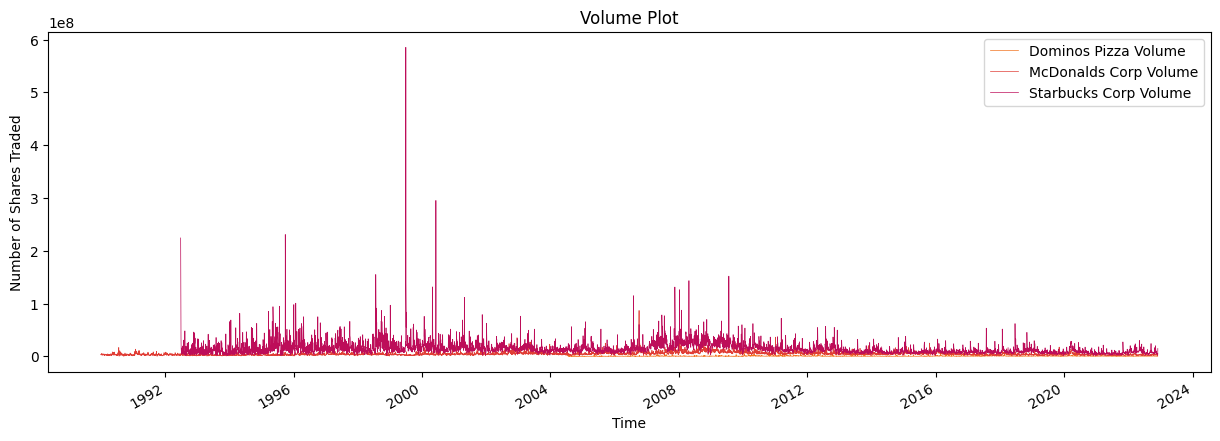

In [83]:
#Comparison volume plots
dpz['Volume'].plot(label = 'Dominos Pizza Volume', figsize = (15, 5), linewidth = 0.5, color = '#f1731f')
mcd['Volume'].plot(label = 'McDonalds Corp Volume', linewidth = 0.5, color = '#e03e36')
sbux['Volume'].plot(label = 'Starbucks Corp Volume', linewidth = 0.5, color = '#bd0d59')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Number of Shares Traded')
plt.title('Volume Plot')

plt.show()

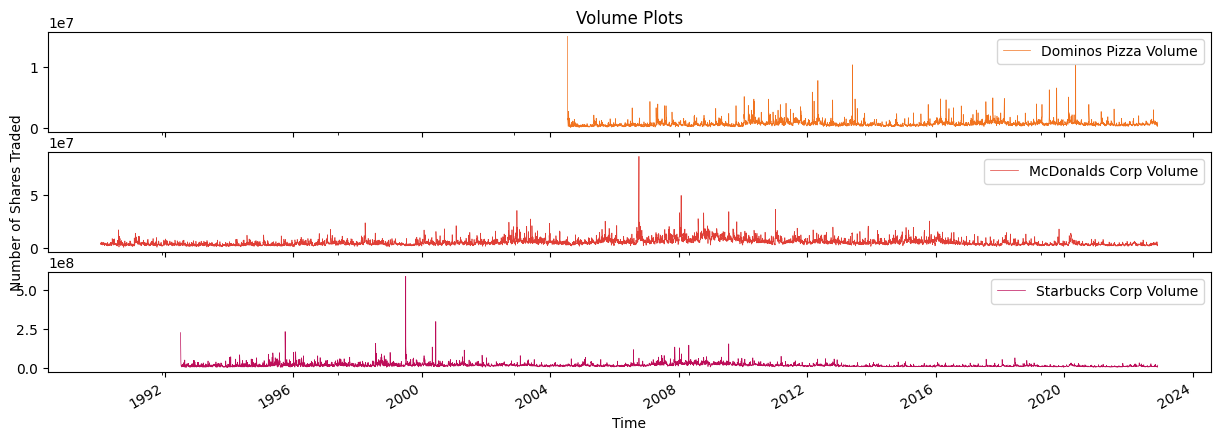

In [84]:
#Comparison volume plots
ax1 = plt.subplot(3, 1, 1)
dpz['Volume'].plot(label = 'Dominos Pizza Volume', figsize = (15, 5), linewidth = 0.5, color = '#f1731f')
plt.title('Volume Plots')
plt.legend()

ax2 = plt.subplot(3, 1, 2, sharex = ax1)
mcd['Volume'].plot(label = 'McDonalds Corp Volume', linewidth = 0.5, color = '#e03e36')
plt.ylabel('Number of Shares Traded')
plt.legend()

ax3 = plt.subplot(3, 1, 3, sharex = ax1)
sbux['Volume'].plot(label = 'Starbucks Corp Volume', linewidth = 0.5, color = '#bd0d59')
plt.xlabel('Time')
plt.legend()

plt.show()

OHLC

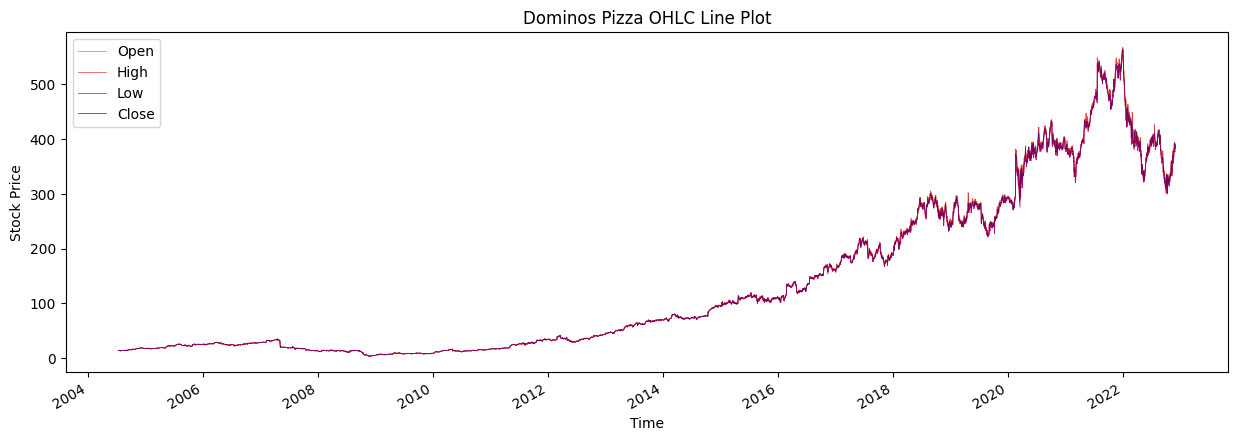

In [85]:
#Dominos Pizza OHLC Plot
dpz['Open'].plot(label = 'Open', figsize = (15, 5), linewidth = 0.5, color = '#f1731f')
dpz['High'].plot(label = 'High', linewidth = 0.5, color = '#e03e36')
dpz['Low'].plot(label = 'Low', linewidth = 0.5, color = '#bd0d59')
dpz['Close'].plot(label = 'Close', linewidth = 0.5, color = '#730662')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Dominos Pizza OHLC Line Plot')

plt.show()

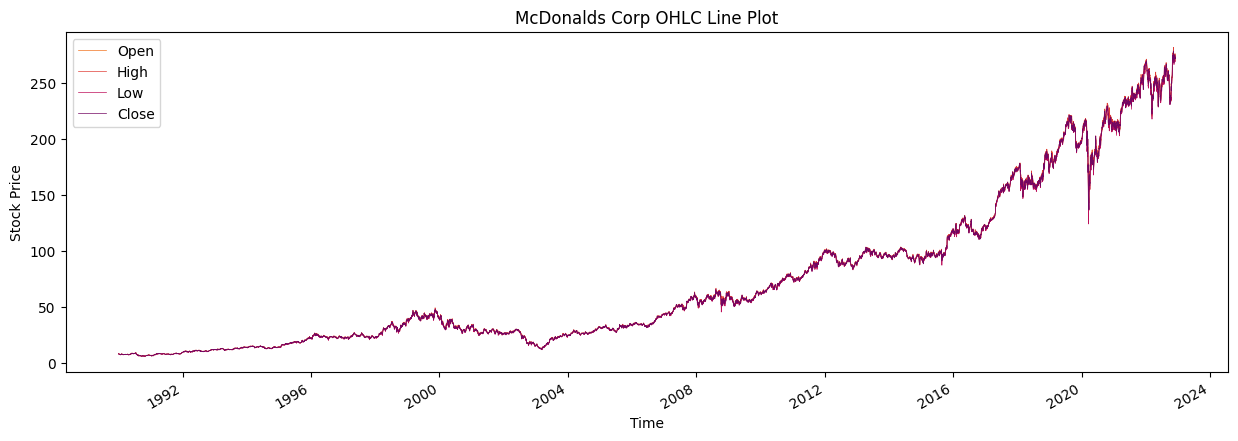

In [86]:
#McDonalds Corp OHLC Plot
mcd['Open'].plot(label = 'Open', figsize = (15, 5), linewidth = 0.5, color = '#f1731f')
mcd['High'].plot(label = 'High', linewidth = 0.5, color = '#e03e36')
mcd['Low'].plot(label = 'Low', linewidth = 0.5, color = '#bd0d59')
mcd['Close'].plot(label = 'Close', linewidth = 0.5, color = '#730662')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('McDonalds Corp OHLC Line Plot')

plt.show()

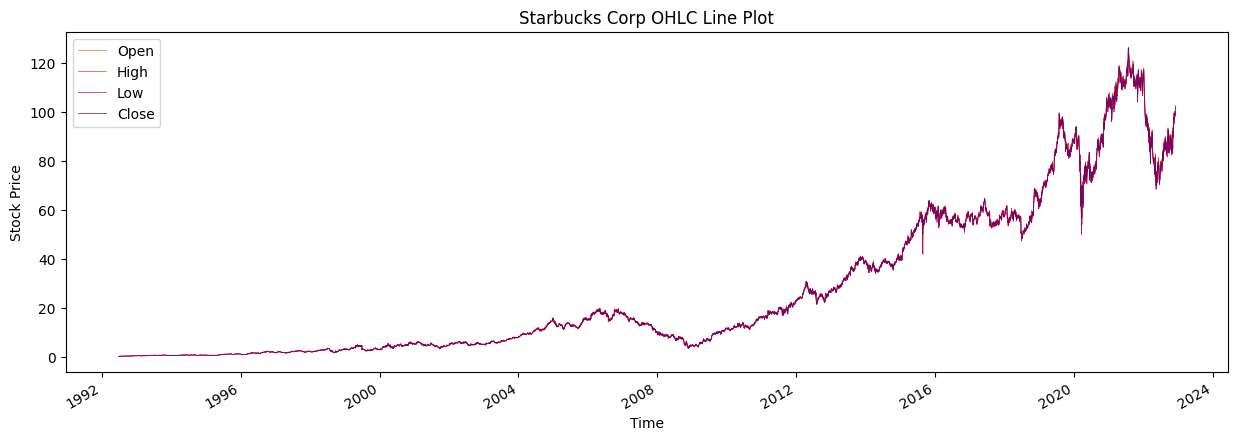

In [87]:
#Starbucks Corp OHLC Plot
sbux['Open'].plot(label = 'Open', figsize = (15, 5), linewidth = 0.5, color = '#f1731f')
sbux['High'].plot(label = 'High', linewidth = 0.5, color = '#e03e36')
sbux['Low'].plot(label = 'Low', linewidth = 0.5, color = '#bd0d59')
sbux['Close'].plot(label = 'Close', linewidth = 0.5, color = '#730662')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Starbucks Corp OHLC Line Plot')

plt.show()

Market Capitalization

In [88]:
dpz['Total Traded'] = dpz['Adj Close'] * dpz['Volume']
mcd['Total Traded'] = mcd['Adj Close'] * mcd['Volume'] 
sbux['Total Traded'] = sbux['Adj Close'] * sbux['Volume'] 

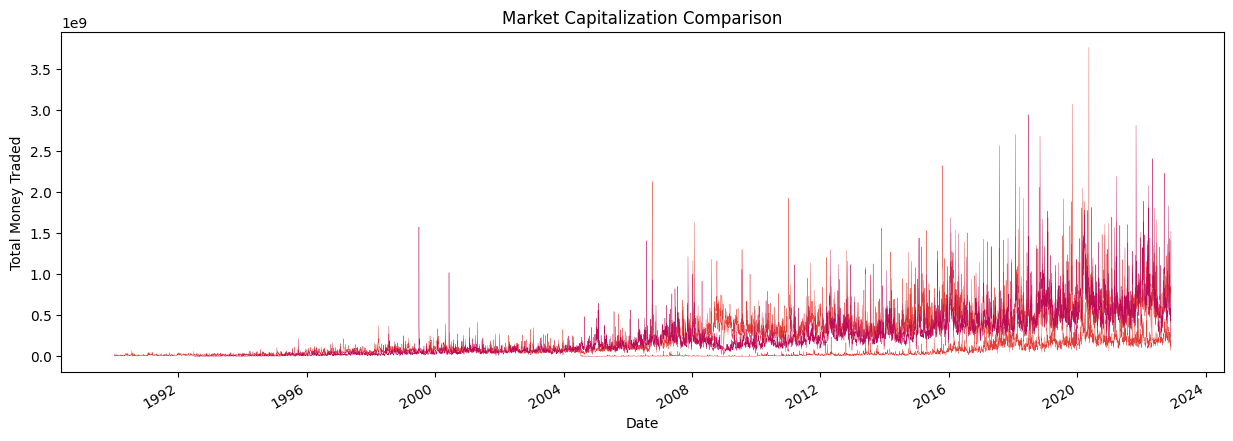

In [89]:
dpz['Total Traded'].plot(label = 'Dominos Pizza', xlabel = 'Time', ylabel = 'Total Money Traded', figsize = (15,5), linewidth = 0.25, title = '', color = '#e03e36')
mcd['Total Traded'].plot(label = 'McDonalds Corp', linewidth = 0.25, title = '', color = '#e03e36')
sbux['Total Traded'].plot(label = 'Starbucks Corp', linewidth = 0.25, title = '', color = '#bd0d59')

plt.title('Market Capitalization Comparison')
plt.show()

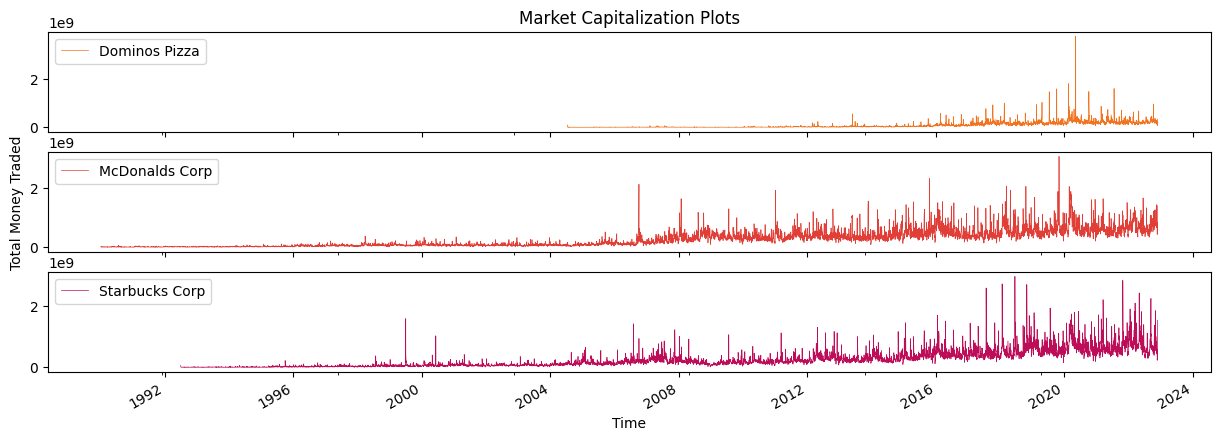

In [90]:
#Comparison Market Capitalization plots
ax1 = plt.subplot(3, 1, 1)
dpz['Total Traded'].plot(label = 'Dominos Pizza', figsize = (15, 5), linewidth = 0.5, color = '#f1731f')
plt.title('Market Capitalization Plots')
plt.legend()

ax2 = plt.subplot(3, 1, 2, sharex = ax1)
mcd['Total Traded'].plot(label = 'McDonalds Corp', linewidth = 0.5, color = '#e03e36')
plt.ylabel('Total Money Traded')
plt.legend()

ax3 = plt.subplot(3, 1, 3, sharex = ax1)
sbux['Total Traded'].plot(label = 'Starbucks Corp', linewidth = 0.5, color = '#bd0d59')
plt.xlabel('Time')
plt.legend()

plt.show()

Moving Average

In [91]:
dpz['Mov Av 80'] = dpz['Adj Close'].rolling(80).mean()
mcd['Mov Av 80'] = mcd['Adj Close'].rolling(80).mean()
sbux['Mov Av 80'] = sbux['Adj Close'].rolling(80).mean()

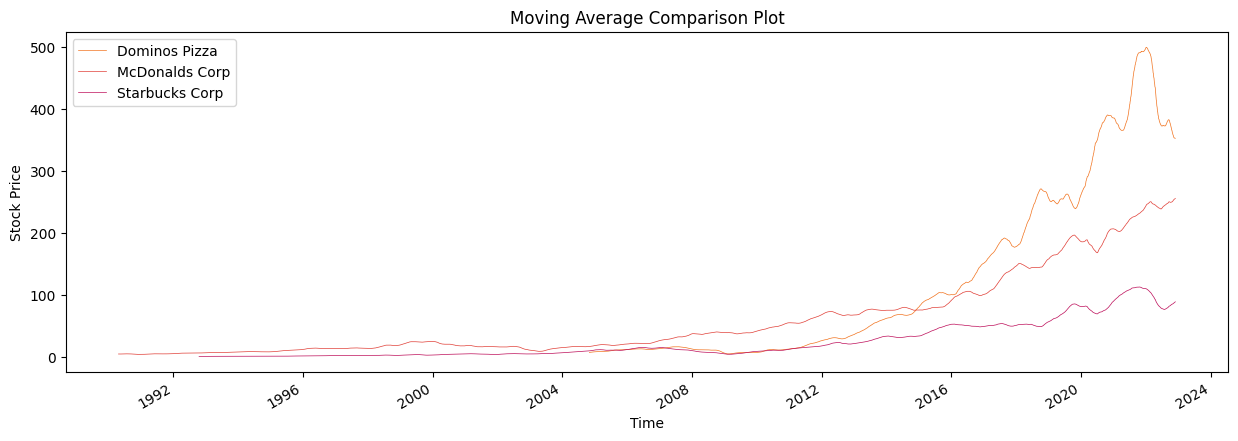

In [92]:
#Moving Average Comparison Plot
dpz['Mov Av 80'].plot(label = 'Dominos Pizza', figsize = (15, 5), linewidth = 0.5, color = '#f1731f')
mcd['Mov Av 80'].plot(label = 'McDonalds Corp', linewidth = 0.5, color = '#e03e36')
sbux['Mov Av 80'].plot(label = 'Starbucks Corp', linewidth = 0.5, color = '#bd0d59')

plt.legend()
plt.title('Moving Average Comparison Plot')
plt.ylabel('Stock Price')
plt.xlabel('Time')
plt.show()

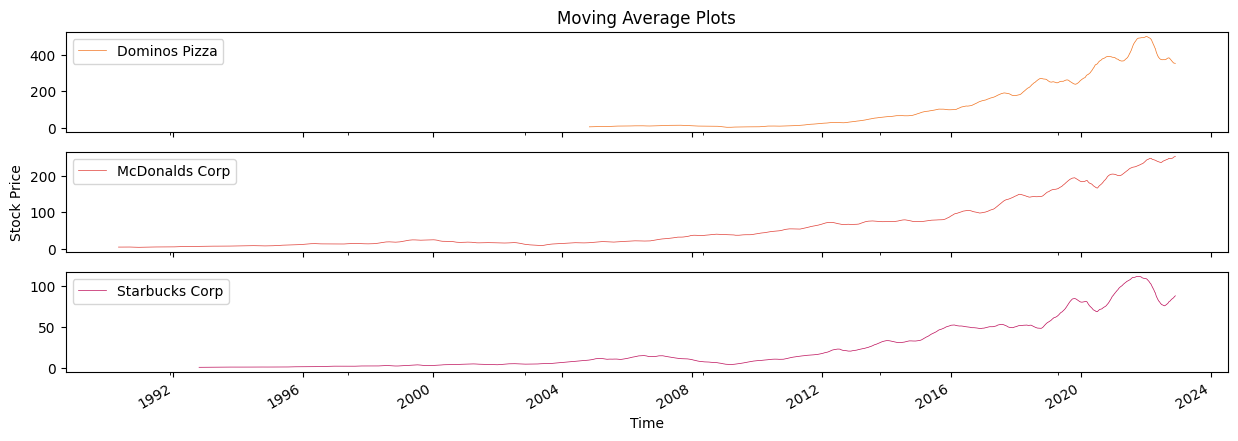

In [93]:
#Moving Average Plots
ax1 = plt.subplot(3, 1, 1)
dpz['Mov Av 80'].plot(label = 'Dominos Pizza', figsize = (15, 5), linewidth = 0.5, color = '#f1731f')
plt.title('Moving Average Plots')
plt.legend()

ax2 = plt.subplot(3, 1, 2, sharex = ax1)
mcd['Mov Av 80'].plot(label = 'McDonalds Corp', linewidth = 0.5, color = '#e03e36')
plt.ylabel('Stock Price')
plt.legend()

ax3 = plt.subplot(3, 1, 3, sharex = ax1)
sbux['Mov Av 80'].plot(label = 'Starbucks Corp', linewidth = 0.5, color = '#bd0d59')
plt.xlabel('Time')
plt.legend()

plt.show()

Daily Percentage Change

In [94]:
#Percent Returns
dpz['Returns'] = (dpz['Adj Close']/dpz['Adj Close'].shift(1))-1
mcd['Returns'] = (mcd['Adj Close']/mcd['Adj Close'].shift(1))-1
sbux['Returns'] = (sbux['Adj Close']/sbux['Adj Close'].shift(1))-1

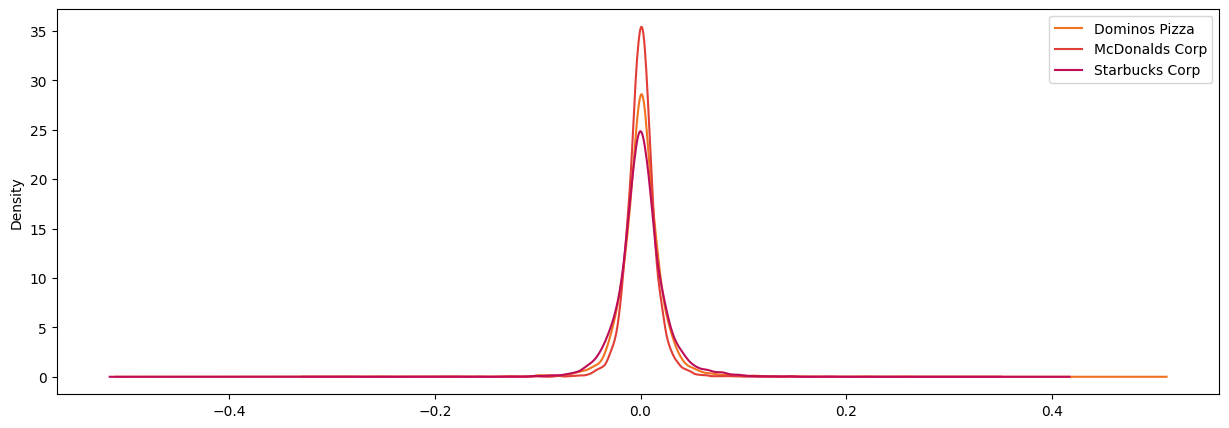

In [95]:
#Volatility with a Kernel Density Estimate Graph
dpz['Returns'].plot(kind = 'kde', label = 'Dominos Pizza', figsize = (15, 5), color = '#f1731f')
mcd['Returns'].plot(kind = 'kde', label = 'McDonalds Corp', color = '#e03e36')
sbux['Returns'].plot(kind = 'kde', label = 'Starbucks Corp', color = '#bd0d59')

plt.legend()
plt.show()

Scatter Matrix

In [96]:
restaurants = pd.concat([dpz['Adj Close'], mcd['Adj Close'], sbux['Adj Close']], axis = 1)
restaurants.columns = ['Dominos Pizza Adj Close', 'McDonalds Corp Adj Close', 'Starbucks Corp Adj Close']

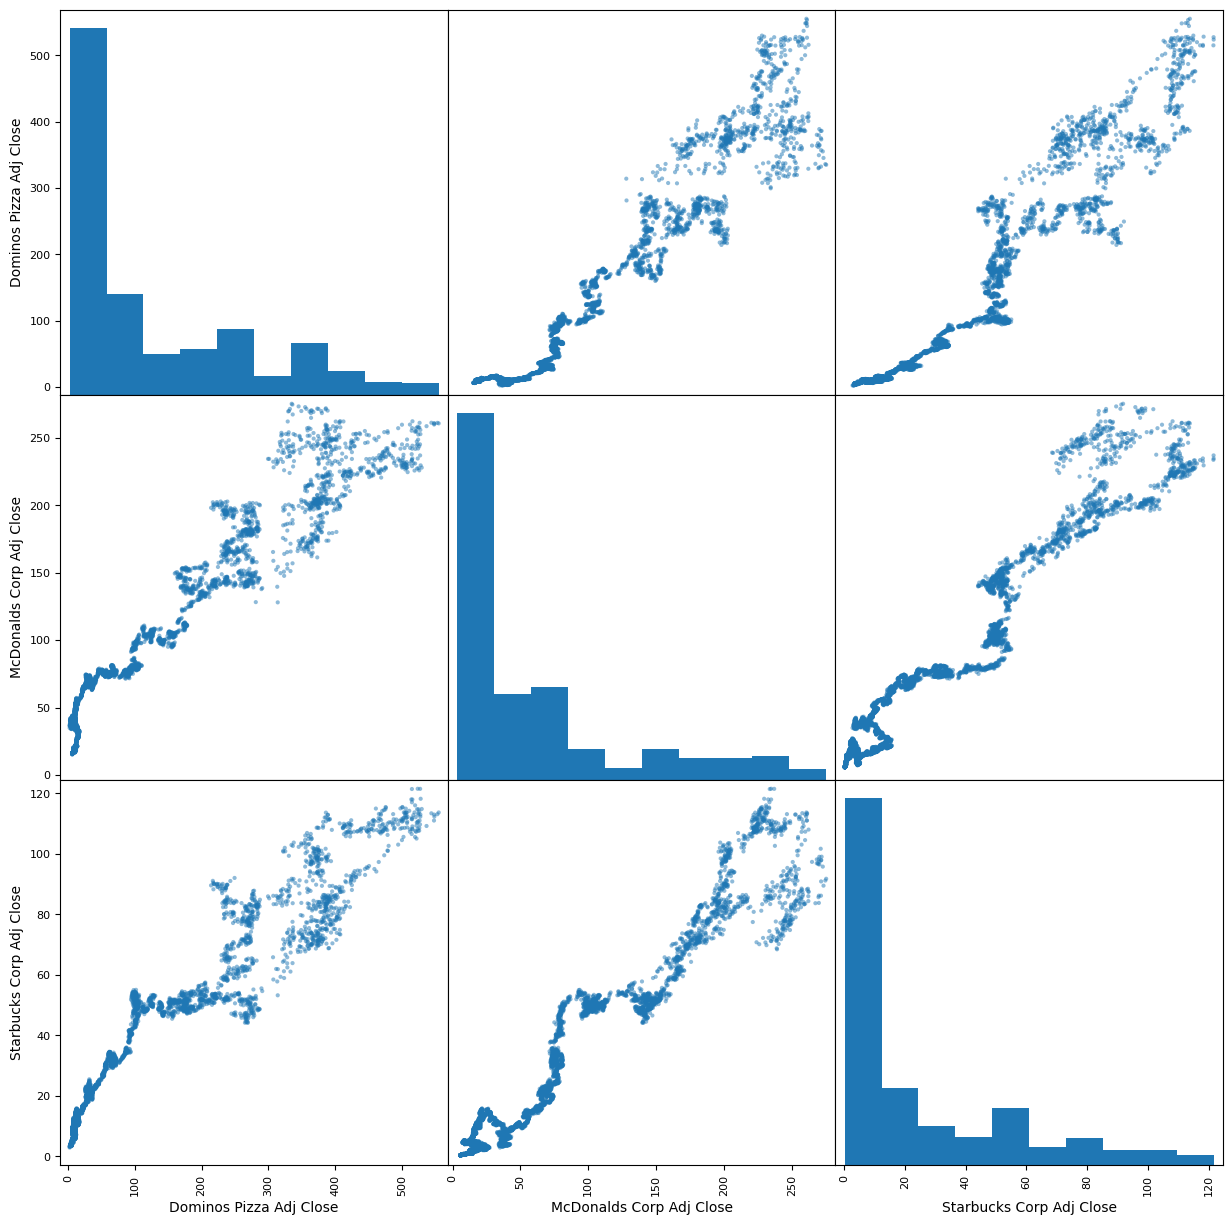

In [97]:
scatter_matrix(restaurants, figsize = (15, 15))
plt.show()

* McDonald's

"A set of quantifiable measurements used to gauge a company's overall long-term performance."
"...help determine a company's strategic, financial, and operational achievements."
KPIs must have:
- Targets.
- A specific timeframe for reaching the target.
- Be relevant to business outcomes.


From the analysis before, three companies were chosen from three  different sub-industries:
* Amazon (AMZN)
* Nike (NKE)
* McDonald's Corporation (MCD)

As KPI's for this analysis:
- Yearly Stock % Price Change.
- Dividend Yield %.
- Transacted Money Change.

# KPIs 

## Yearly Stock % Price Change

$$
r_{t} = \frac{p_{t}}{p_{t-1}}\ - 1
$$

In [98]:
#Yearly Average of Daily Percent Returns
amzn_yspc = amzn.groupby(amzn.index.year)['Returns'].mean()
nke_yspc = nke.groupby(nke.index.year)['Returns'].mean()
mcd_yspc = mcd.groupby(mcd.index.year)['Returns'].mean()

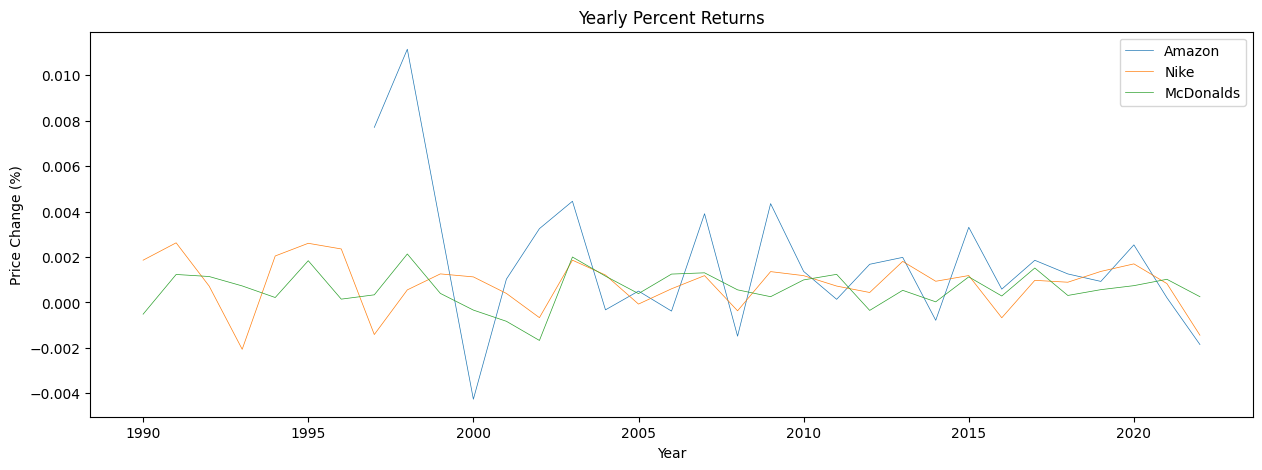

In [99]:
#Graphs
amzn_yspc.plot(label = 'Amazon', figsize = (15, 5), linewidth = 0.5)
nke_yspc.plot(label = 'Nike', linewidth = 0.5)
mcd_yspc.plot(label = 'McDonalds', linewidth = 0.5)

plt.title('Yearly Percent Returns')
plt.xlabel('Year')
plt.ylabel('Price Change (%)')
plt.legend()
plt.show()

## Dividend Yield %

"Measures how much a company pays out in dividends each year relative to its share price."
$$
DY = \frac{Dividend}{Avg Share Price} 
$$

In [100]:
nke_dividend = pd.read_csv("Nike, Inc. Common Stock (NKE) Dividend History _ Nasdaq.csv")
mcd_dividend = pd.read_csv("McDonald's Corporation Common Stock (MCD) Dividend History _ Nasdaq.csv")

In [101]:
#Average Share Price
nke_asp = nke.groupby(nke.index.year)['Adj Close'].mean()
mcd_asp = mcd.groupby(mcd.index.year)['Adj Close'].mean()

In [102]:
#Dividends for Nike
nke_dividend['PAYMENT DATE'] = pd.to_datetime(nke_dividend['PAYMENT DATE'])
nke_dividend = nke_dividend[['PAYMENT DATE', 'CASH AMOUNT']]
nke_dividend['CASH AMOUNT'] = nke_dividend['CASH AMOUNT'].str.strip('$')
nke_dividend['CASH AMOUNT'] = pd.to_numeric(nke_dividend['CASH AMOUNT'])

nke_dividend = nke_dividend.groupby(nke_dividend['PAYMENT DATE'].dt.year)['CASH AMOUNT'].sum()

In [103]:
#Preparing Nike DataFrames
nke_asp = pd.DataFrame({'year': nke_asp.index, 'avg share price': nke_asp.values})
nke_dividend = pd.DataFrame({'year': nke_dividend.index, 'dividend': nke_dividend.values})

nke_dyp = nke_asp.set_index('year').join(nke_dividend.set_index('year'))

In [104]:
#Dividends for McDonalds
mcd_dividend['PAYMENT DATE'] = pd.to_datetime(mcd_dividend['PAYMENT DATE'])
mcd_dividend = mcd_dividend[['PAYMENT DATE', 'CASH AMOUNT']]
mcd_dividend = mcd_dividend[mcd_dividend['PAYMENT DATE'].dt.year > 1990]
mcd_dividend['CASH AMOUNT'] = mcd_dividend['CASH AMOUNT'].str.strip('$')
mcd_dividend['CASH AMOUNT'] = pd.to_numeric(mcd_dividend['CASH AMOUNT'])

mcd_dividend = mcd_dividend.groupby(mcd_dividend['PAYMENT DATE'].dt.year)['CASH AMOUNT'].sum()

In [105]:
#Preparing McDonalds DataFrames
mcd_asp = pd.DataFrame({'year': mcd_asp.index, 'avg share price': mcd_asp.values})
mcd_dividend = pd.DataFrame({'year': mcd_dividend.index, 'dividend': mcd_dividend.values})

mcd_dyp = mcd_asp.set_index('year').join(mcd_dividend.set_index('year'))

In [106]:
#Calculating Dividend Yield %
nke_dyp['dividend yield'] = (nke_dyp['dividend'] / nke_dyp['avg share price'])*100
mcd_dyp['dividend yield'] = (mcd_dyp['dividend'] / mcd_dyp['avg share price'])*100

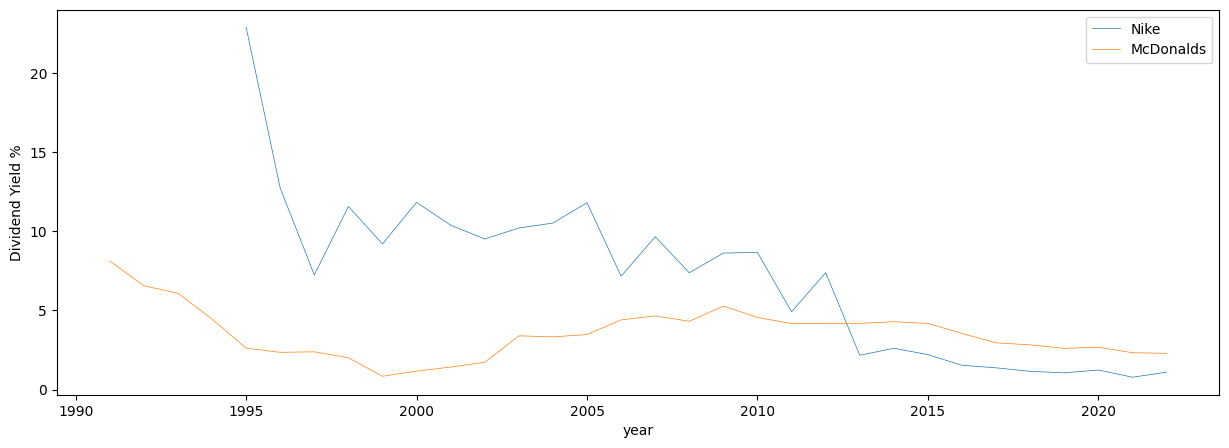

In [107]:
#Comparison Plot
nke_dyp['dividend yield'].plot(label = 'Nike', xlabel = 'Year', ylabel = 'Dividend Yield %', figsize=(15, 5), linewidth = 0.5)
mcd_dyp['dividend yield'].plot(label = 'McDonalds', linewidth = 0.5)
plt.legend()
plt.show()

## Transacted Money Change

$$
TMC = \frac{Total Traded Current Year}{Total Traded Last Year} - 1
$$

In [108]:
#Calculating TMC for Amazon
amzn_tmc = pd.DataFrame(amzn.groupby(amzn.index.year)['Total Traded'].mean())
amzn_tmc['Transacted Money Change'] = (amzn_tmc['Total Traded']/amzn_tmc['Total Traded'].shift(1))-1

In [109]:
#Calculating TMC for Nike
nke_tmc = pd.DataFrame(nke.groupby(nke.index.year)['Total Traded'].mean())
nke_tmc['Transacted Money Change'] = (nke_tmc['Total Traded']/nke_tmc['Total Traded'].shift(1))-1

In [110]:
#Calculating TMC for McDonalds
mcd_tmc = pd.DataFrame(mcd.groupby(mcd.index.year)['Total Traded'].mean())
mcd_tmc['Transacted Money Change'] = (mcd_tmc['Total Traded']/mcd_tmc['Total Traded'].shift(1))-1

[]

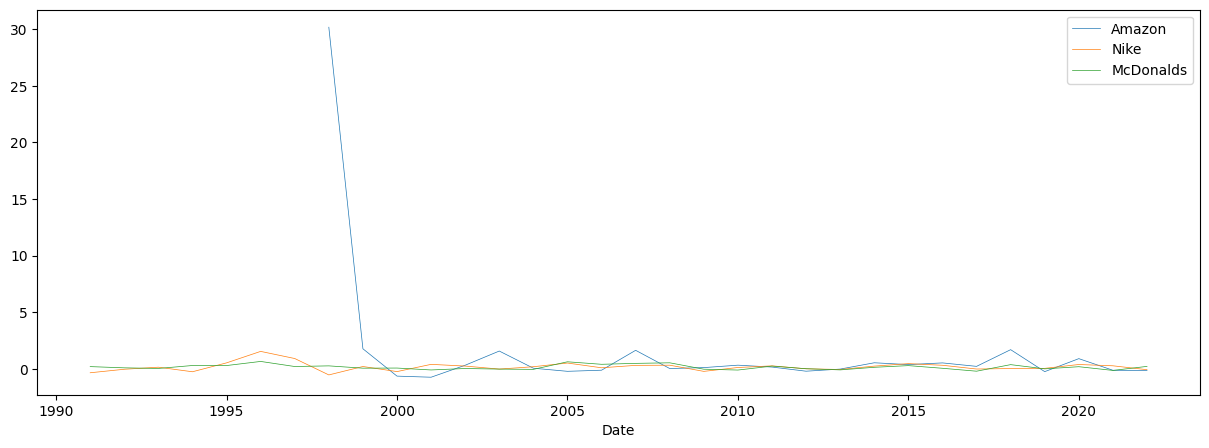

In [111]:
#Comparison Plot
amzn_tmc['Transacted Money Change'].plot(label = 'Amazon', figsize = (15, 5), linewidth = 0.5)
nke_tmc['Transacted Money Change'].plot(label = 'Nike', linewidth = 0.5)
mcd_tmc['Transacted Money Change'].plot(label = 'McDonalds', linewidth = 0.5)

plt.title = 'Transacted Money Change'
plt.xlabel = 'Year'
plt.ylabel = 'Percentage of Money Transacted'
plt.legend()
plt.plot()

# Day of the Week

Which is the best day of the week to invest in these companies?

In [112]:
#Adj Close Chart.


In [113]:
amzn.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6430 entries, 1997-05-15 to 2022-11-30
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          6430 non-null   float64
 1   High          6430 non-null   float64
 2   Low           6430 non-null   float64
 3   Close         6430 non-null   float64
 4   Adj Close     6430 non-null   float64
 5   Volume        6430 non-null   int64  
 6   Total Traded  6430 non-null   float64
 7   Mov Av 80     6351 non-null   float64
 8   Returns       6429 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 502.3 KB


In [114]:
#Select the last three years of the dataframes.
amzn_3y = amzn.loc['2019-01-01' : '2022-12-31']
nke_3y = nke.loc['2019-01-01' : '2022-12-31']
mcd_3y = mcd.loc['2019-01-01' : '2022-12-31']

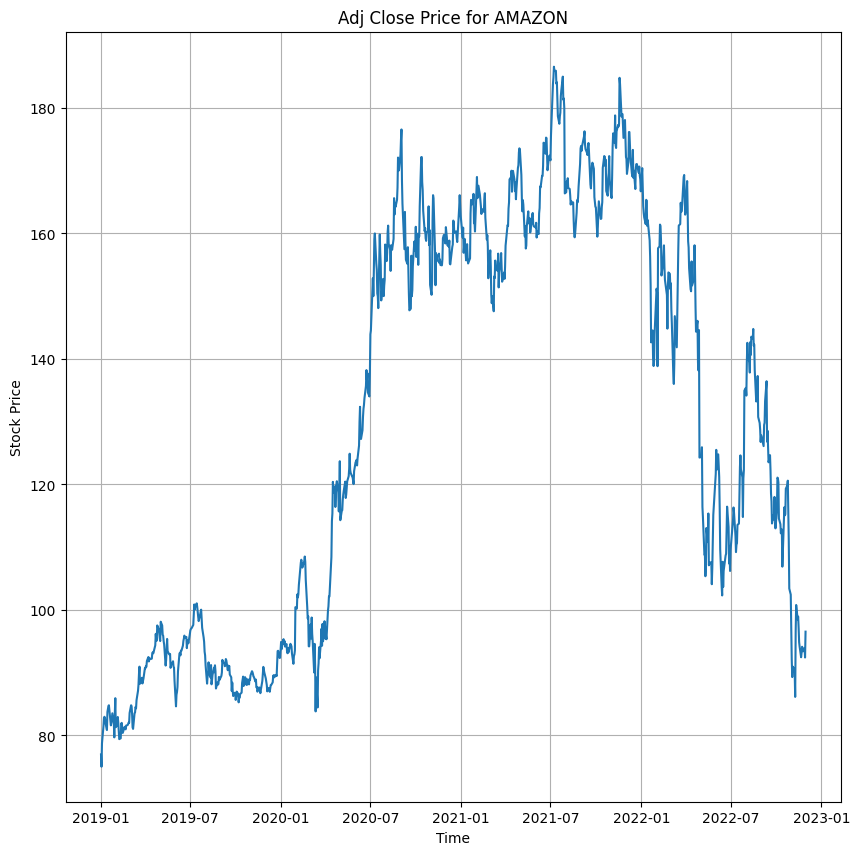

In [115]:
#Plot the Adj Close value for AMZN (matplotlib will automatically treat Datetime Index as x axis).

#Data.
amzn_y = amzn_3y['Adj Close']

#Plot.
fig, ax = plt.subplots(figsize = (10, 10))
ax.plot(amzn_y)

ax.set(xlabel = 'Time', ylabel = 'Stock Price', title = 'Adj Close Price for AMAZON')

ax.grid()
plt.show()

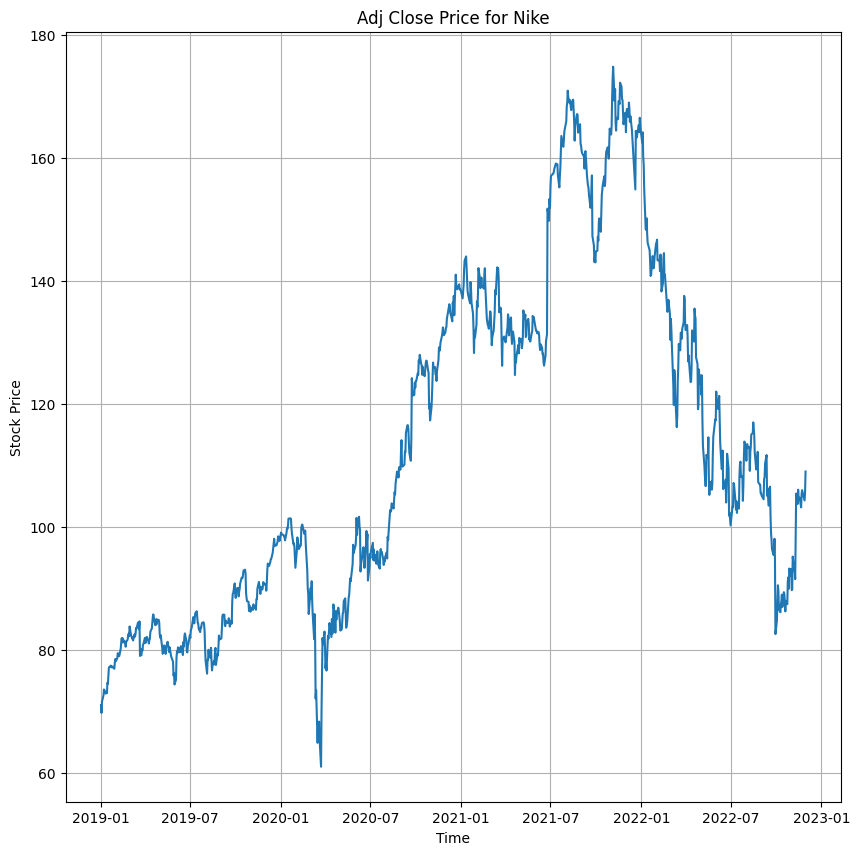

In [116]:
#Plot the Adj Close value for NKE.
#Data.
nke_y = nke_3y['Adj Close']

#Plot.
fig, ax = plt.subplots(figsize = (10, 10))
ax.plot(nke_y)

ax.set(xlabel = 'Time', ylabel = 'Stock Price', title = 'Adj Close Price for Nike')

ax.grid()
plt.show()

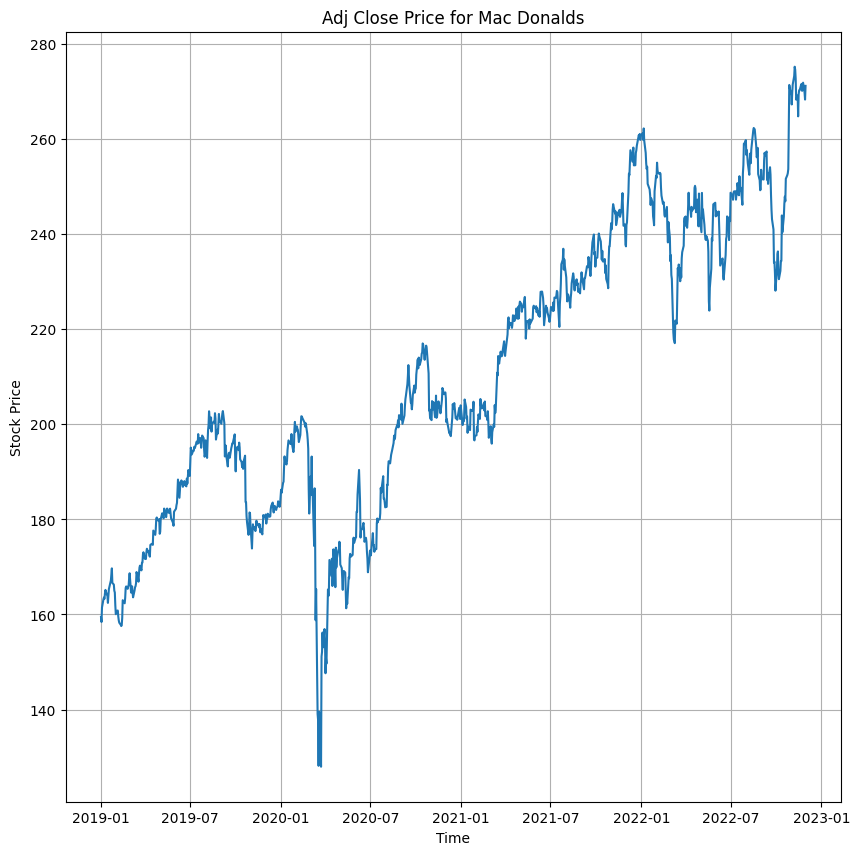

In [117]:
#Plot the Adj Close value for MCD.
#Data.
mcd_y = mcd_3y['Adj Close']

#Plot.
fig, ax = plt.subplots(figsize = (10, 10))
ax.plot(mcd_y)

ax.set(xlabel = 'Time', ylabel = 'Stock Price', title = 'Adj Close Price for Mac Donalds')

ax.grid()
plt.show()

<Axes: >

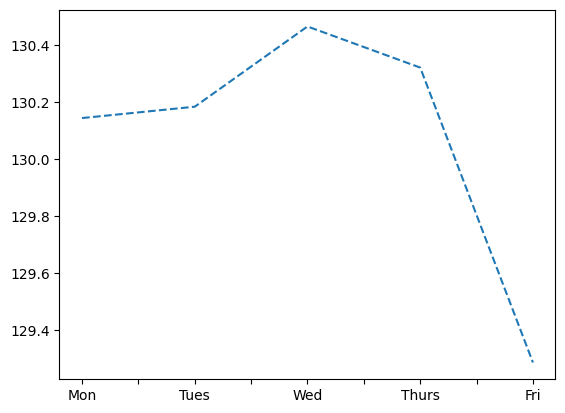

In [118]:
#Adj Close Price for Amazon Stocks by Weekday.
amzn_day = amzn_3y.resample('D').mean()
amzn_weekday = amzn_day.groupby(amzn_day.index.dayofweek).mean()
amzn_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
#Plot
amzn_weekday['Adj Close'].plot(style = '--')

<Axes: >

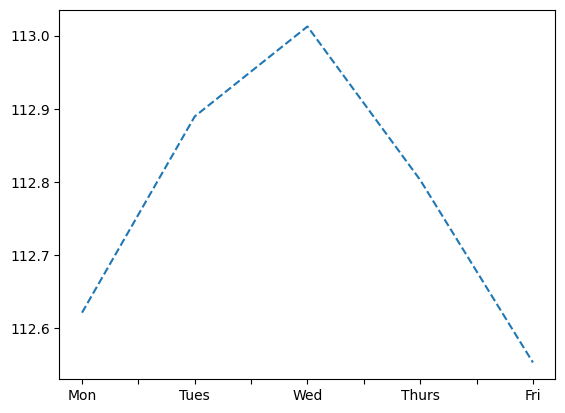

In [119]:
#Adj Close Price for Nike Stocks by Weekday.
nke_day = nke_3y.resample('D').mean()
nke_weekday = nke_day.groupby(nke_day.index.dayofweek).mean()
nke_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
#Plot
nke_weekday['Adj Close'].plot(style = '--')

<Axes: >

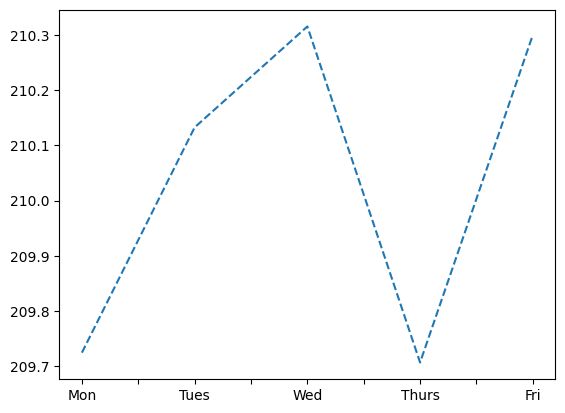

In [120]:
#Adj Close Price for Mc Donalds Stocks by Weekday.
mcd_day = mcd_3y.resample('D').mean()
mcd_weekday = mcd_day.groupby(mcd_day.index.dayofweek).mean()
mcd_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
#Plot
mcd_weekday['Adj Close'].plot(style = '--')

Best weekdays to invest:
- AMZN: Friday 
- NKE: Monday & Friday
- MCD: Monday & Thursday